# Problem Statement:
  Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#calling csv file
df = pd.read_csv('IBM_HR_Employee_Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# prints no. of rows & columns
df.shape

(1470, 35)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Exploratory Data Analysis

In [5]:
#print brief info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Lead from observation:
    1. No-null value present.
    2. Total of 9 columns are object type(categorical) & rest of them are integers

In [6]:
#verifying the quantity of null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

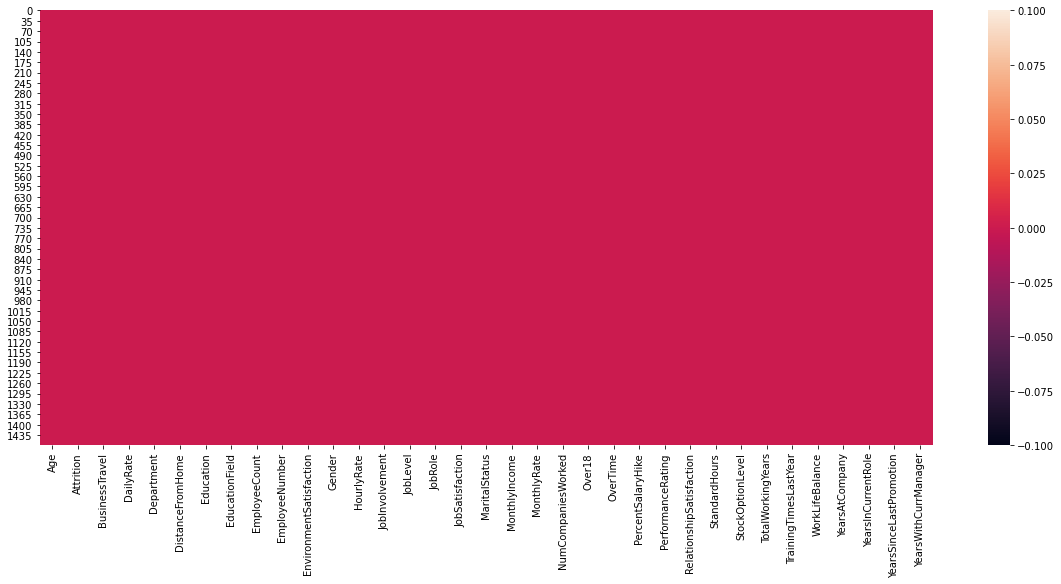

In [7]:
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull())

In [8]:
#displaying unique value counts for every features
df.apply(lambda x: len(x.unique()))

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

#### Categorical variables are:
    1. Attrition 
    2. Business Travel
    3. Department
    4. Education
    5. Education Field
    6. Environment Satisfaction
    7. Gender
    8. Job Involvment
    9. JobLevel
    10. JobRole
    11. JobSatisfaction
    12. Marital Status
    13. Over18
    14. OverTime
    15. PeformanceRating
    16. RelationshipSatisfaction     #StandardHours --> in doubt
    17. StockOptionLevel (in doubt)
    18. TrainingTimesLastYear
    19. WorkLifeBalance (in doubt)


In [9]:
#displayng columns whose datatype is object
cat_cols = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        print(f"'{i}' unique values")
        print(df[i].value_counts())
        print(df[i].value_counts(normalize = True))
        print('\n')
        cat_cols.append(i)

'Attrition' unique values
No     1233
Yes     237
Name: Attrition, dtype: int64
No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


'BusinessTravel' unique values
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64


'Department' unique values
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64


'EducationField' unique values
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108

### Attrition

In [10]:
attr_percent = df['Attrition'].value_counts(normalize = True)
attr_percent

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

#### 83.87% of employee were not attrited and 16.12% were attrited

In [11]:
attr_label = df['Attrition'].value_counts().index
attr_count = df['Attrition'].value_counts().values

In [12]:
#displaying number of employee in attrition 
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

([<matplotlib.patches.Wedge at 0x18ecbccc8b0>,
 [Text(-1.0056140220003909, 0.5578892710531345, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')],
 [Text(-0.5683905341741339, 0.3153287184213368, '83.88%'),
  Text(0.5246681853915082, -0.2910726631581571, '16.12%')])

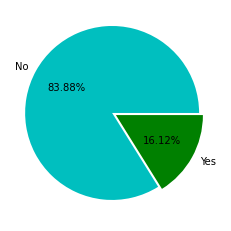

In [13]:
plt.pie(attr_count, labels = attr_label, autopct = '%1.2f%%', explode = (0.05,0), colors = ['c','g'])

In [14]:
def pplot(df,i):
    sns.set_style('whitegrid')
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    sns.countplot(x = i, data = df)
    plt.xticks(rotation = 75)
    plt.subplot(1,2,2)
    plt.pie(df[i].value_counts().values, labels = df[i].value_counts().index,autopct = '%1.2f%%' )
    

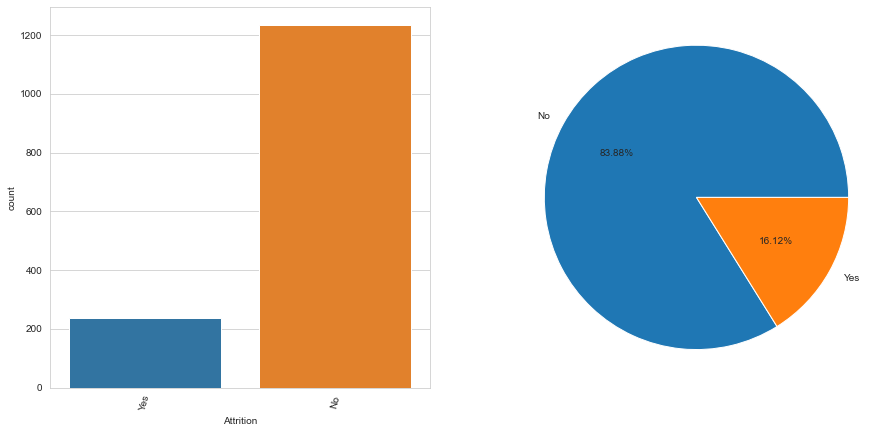

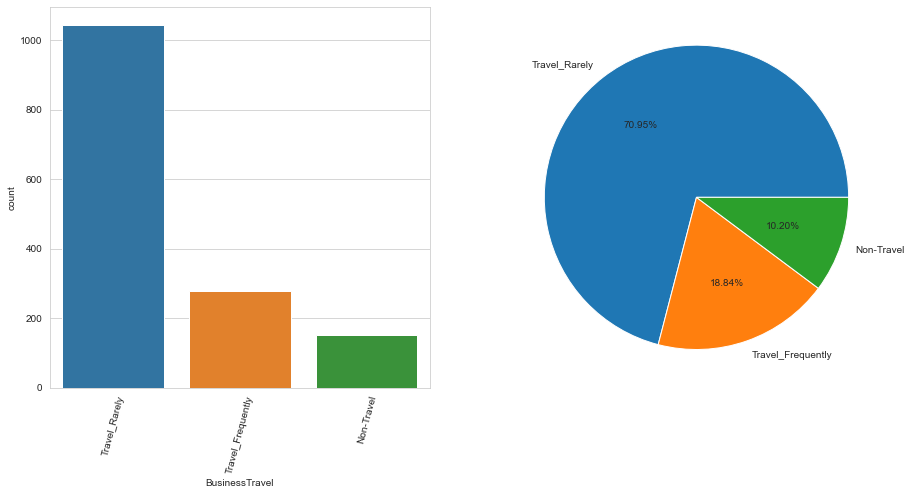

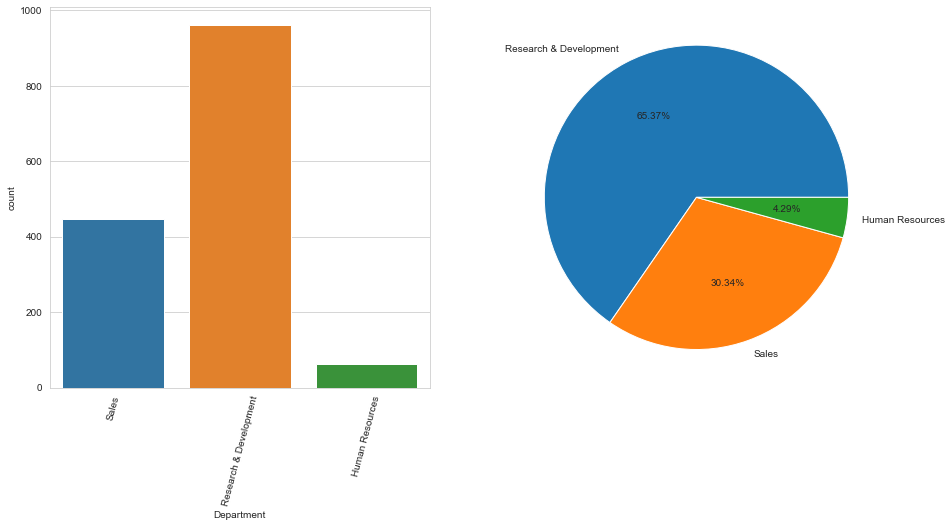

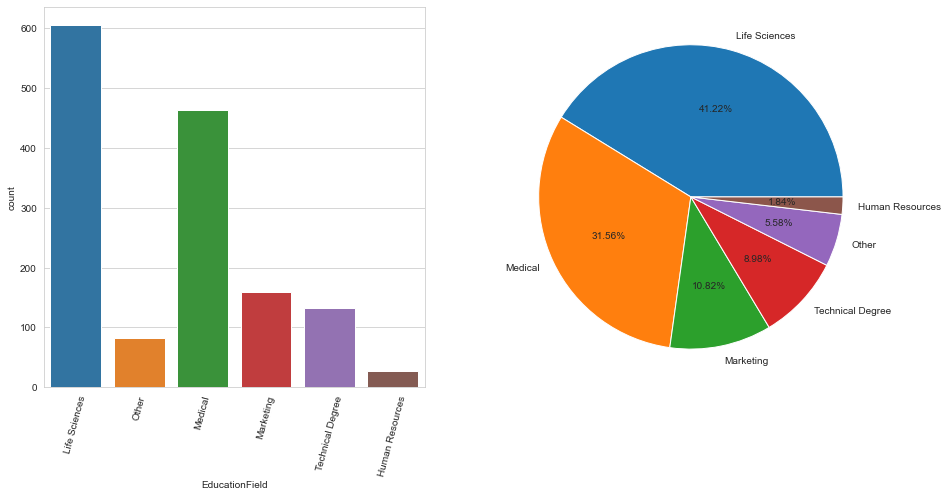

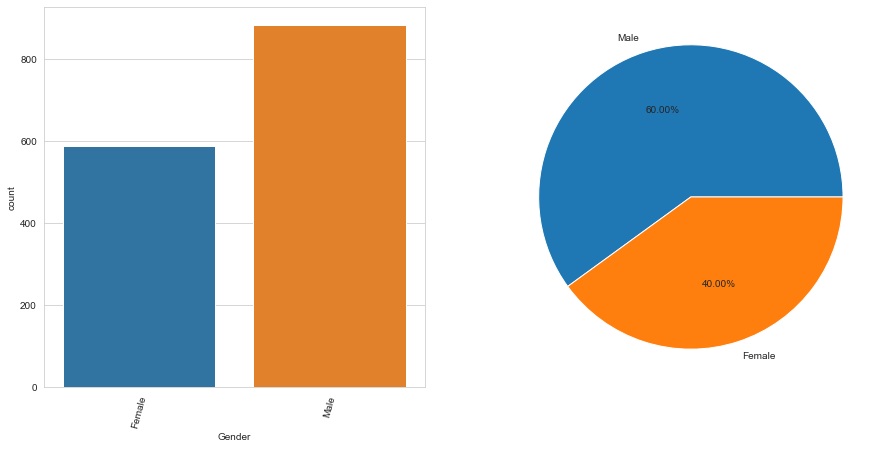

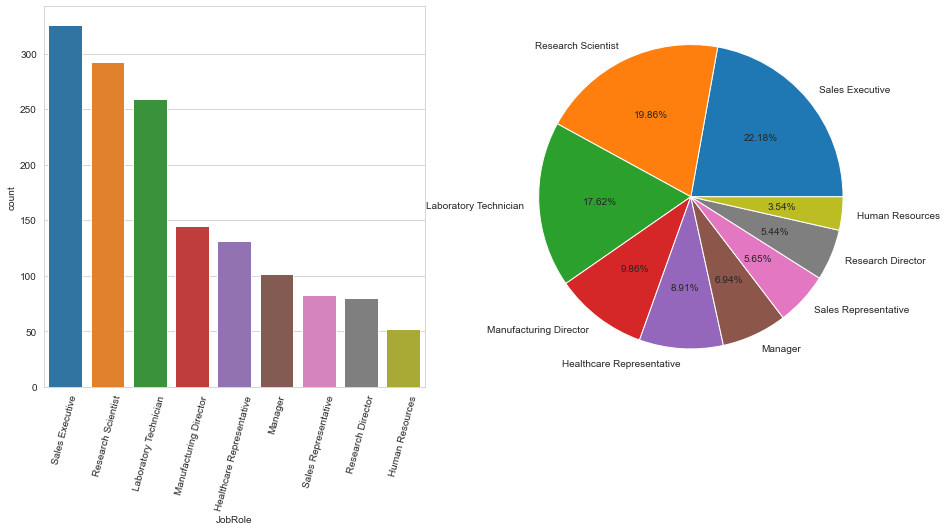

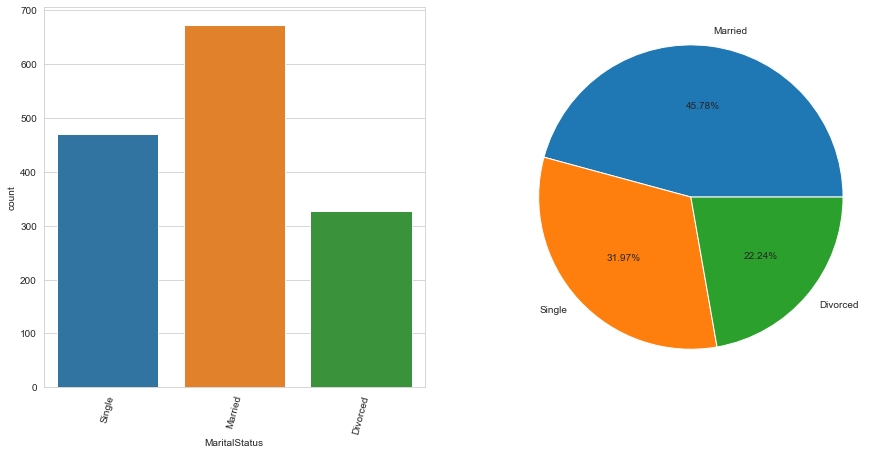

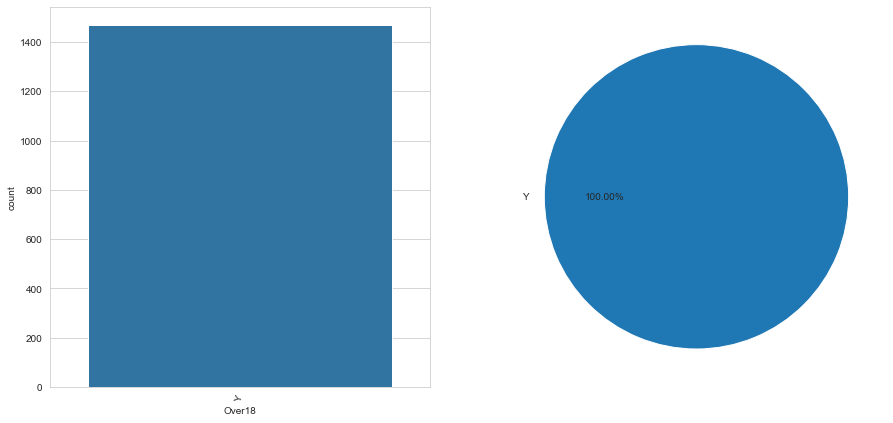

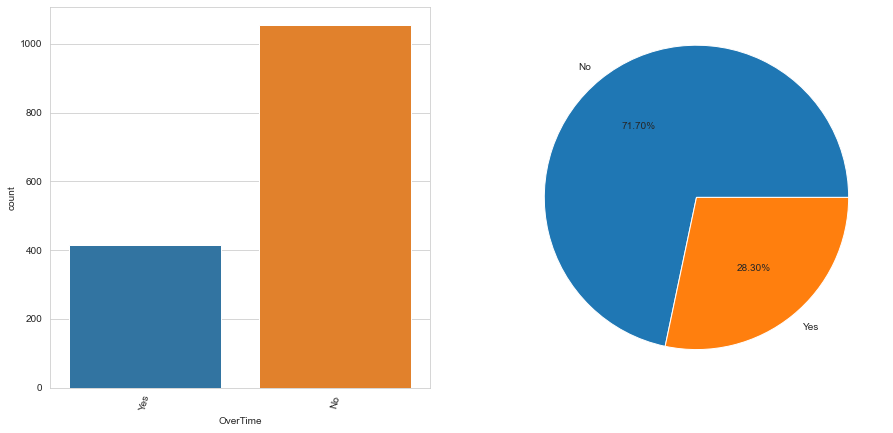

In [15]:
for i in cat_cols:
    pplot(df,i)

#### Takeaway from above categorical values:
    1. For Attrition, the rate of employees being retained is more than that of attrited
    2. No. of employees travelling rarely are huge as compared to those who travel frquently or are non-traveller
    3. R&D dept. have more employees while HR dept. has only 63
    4. Over 1000 employees are recruited in Life Science & Medical. Other field is Marketing & Technical Degree. HR field is least recruited with 27 employee
    5. Sales exec. contributes 22% of job roles, Researcher & Lab.Technician contributes 19.86 & 17.69%. Rest of all job roles are <10%
    6. All the employees are over 18 yrs
    7. Over 28% of employee are doing Overtime.


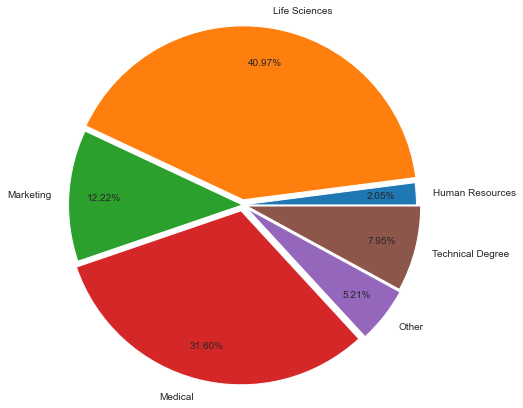

In [16]:
grouping1=df.groupby('EducationField')['MonthlyIncome'].sum()
grouping1.plot.pie(autopct='%1.2f%%', explode=(0.0,0.06,0.0,0.07,0.07,0.05), pctdistance=0.8, radius=2.0)
plt.show()

In [17]:
#displayin columns with interger datatype:
num_cols = []
for i in df.dtypes.index:
    if (df.dtypes[i] =='int64'):
        num_cols.append(i)
        
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [18]:
#we'll remove the EmployeeCount and EmployeeNumber from the dataframe as it does not account for aiding in prediction
df.drop(['EmployeeCount','EmployeeNumber'], axis = 1, inplace = True)

In [19]:
#Let's check if there are any other columns which are not useful to ML
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [20]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

#### We can remove StandardHOurs & Over18 as they barely make sense in regards to attrition

In [21]:
df.drop(['StandardHours','Over18'], axis=1, inplace = True)

In [22]:
#Explore more on other columns
df['Age'].value_counts()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

#### We have 8 employees who are 18yrs of age and the 5 employees who are 60yrs old

In [23]:
df['DailyRate'].nunique() #we can't do anything about this feature

886

In [24]:
df['DistanceFromHome'].unique() 

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

In [25]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

#### Most of the employee are enrolled in Education type 3,4,2

In [26]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

#### Looks like satisfaction rate 3&4 are highly rated by employees

In [27]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

#### Employees Ration in JobLevel 1&2 is high and decreases with increase in joblevel

In [28]:
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [29]:
df['NumCompaniesWorked'].value_counts(normalize = True)

1    0.354422
0    0.134014
3    0.108163
2    0.099320
4    0.094558
7    0.050340
6    0.047619
5    0.042857
9    0.035374
8    0.033333
Name: NumCompaniesWorked, dtype: float64

#### Majority of the employee have worked for only company. While only 3% - 5% have worked more than 5 companies

In [30]:
df['PercentSalaryHike'].value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

#### There are about 900 employees whose salary hike is between 11% - 15%. Very few employees have recieved salary hike >20%

In [31]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

#### Most of the employee are rated 3

In [32]:
df['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [33]:
df['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

#### More than 1100 employee have either 1 or 0 stock option level

In [34]:
df['TotalWorkingYears'].value_counts()

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
28     14
25     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

In [35]:
df['TrainingTimesLastYear'].value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

#### Majority of employees spent 2-3 months in training. Minimum employees are have trained for either 6mos or 0-1mos

In [36]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

#### Medium rating i.e 3 is highest rated while fewer employees have rated 1

In [37]:
df['YearsSinceLastPromotion'].value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
12     10
13     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

In [38]:
df['YearsWithCurrManager'].value_counts()

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64

## Descriptive Stats

In [39]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Key Points:
    1. Age - Max is 60yrs, min is 18yrs, Mean = 36.92, median = 36.
    2. DistanceFromHome - Quite a difference in Q3. 
    3. HourlyRate - Min is 30, Max is 100
    4. MonthlyIncome - Min is 1009, max is 19999. Huge gap in Q3
    5. TotalWorkingYears - Min is 0yrs, Max is 40yrs. Large Q3
    6. YearsAtCompany - Large Q3, and Min-Max is @0-@40
Not much of a difference is Mean & Median for all features

### Visualisation

<AxesSubplot:xlabel='Age', ylabel='count'>

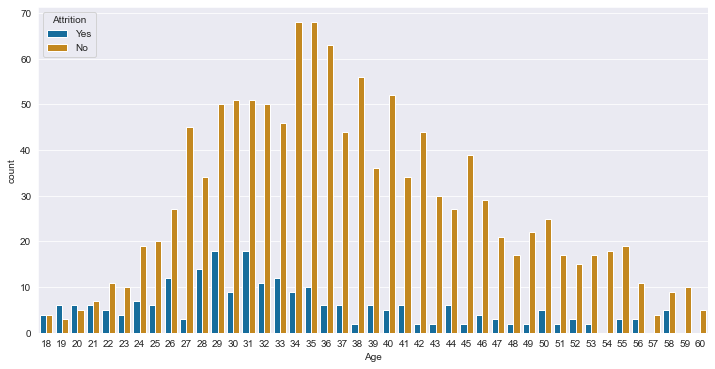

In [40]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.countplot(x='Age', hue = 'Attrition', palette = 'colorblind',data =df )

#### For the age 19&21, employees attrited from the company is higher than retention. Also Employees of the age 29&31 are attrited most 

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

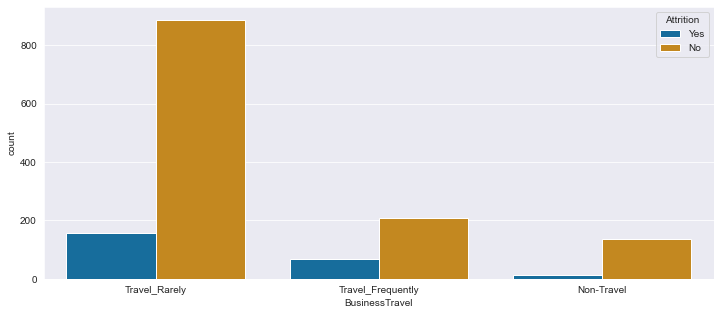

In [41]:
plt.figure(figsize=(12,5))
sns.countplot(x='BusinessTravel', hue = 'Attrition', palette = 'colorblind',data =df )

#### Employees who are travelling rarely are attrited higher than anyother else

<AxesSubplot:xlabel='Department', ylabel='count'>

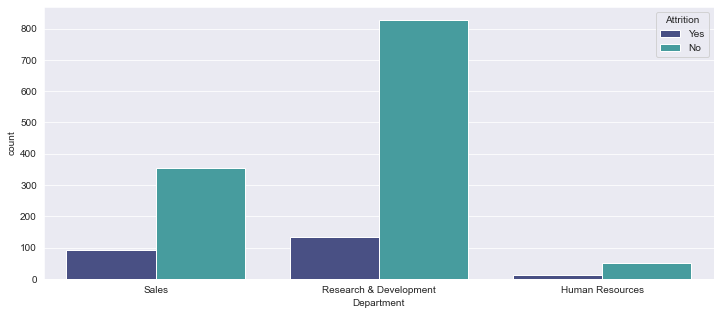

In [42]:
plt.figure(figsize=(12,5))
sns.countplot(x='Department', hue = 'Attrition', palette = 'mako',data =df )

<AxesSubplot:xlabel='Education', ylabel='count'>

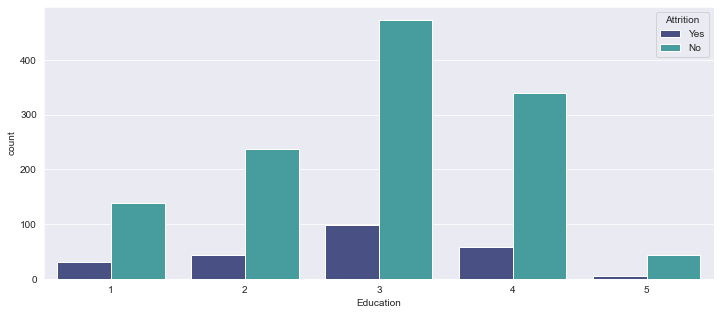

In [43]:
plt.figure(figsize=(12,5))
sns.countplot(x='Education', hue = 'Attrition', palette = 'mako',data =df )

<AxesSubplot:xlabel='EducationField', ylabel='count'>

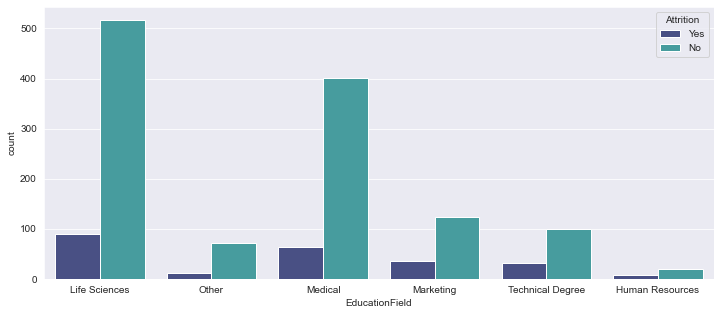

In [44]:
plt.figure(figsize=(12,5))
sns.countplot(x='EducationField', hue = 'Attrition', palette = 'mako',data =df )

#### One thing is obvious that attrition rate is higher where the emplyee count is higher

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

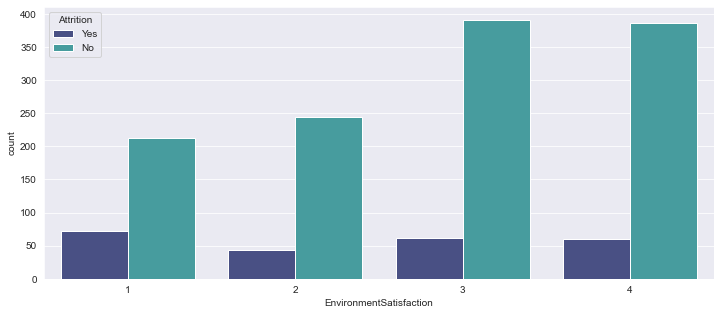

In [45]:
plt.figure(figsize=(12,5))
sns.countplot(x='EnvironmentSatisfaction', hue = 'Attrition', palette = 'mako',data =df )

#### Attrition rate is higher who is not environmentally satisfied but also for the ones who are reasonably satisfied

<AxesSubplot:xlabel='Gender', ylabel='count'>

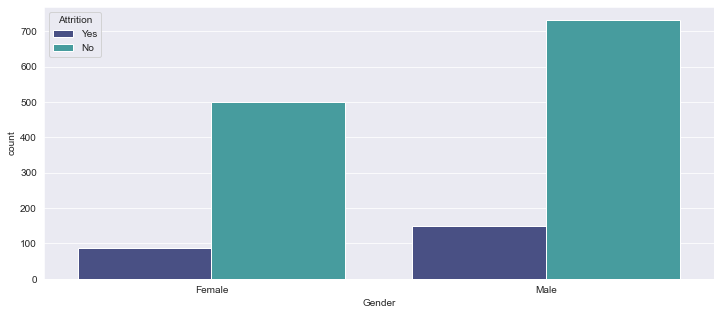

In [46]:
plt.figure(figsize=(12,5))
sns.countplot(x='Gender', hue = 'Attrition', palette = 'mako',data =df )

#### Male attrition rate is higher than female, but male count is aswell greater than female

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

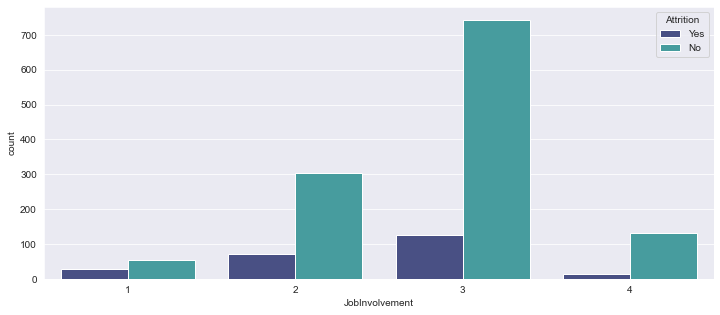

In [47]:
plt.figure(figsize=(12,5))
sns.countplot(x='JobInvolvement', hue = 'Attrition', palette = 'mako',data =df )

#### Employees with jobinvolvement in category 4 is least attrited

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

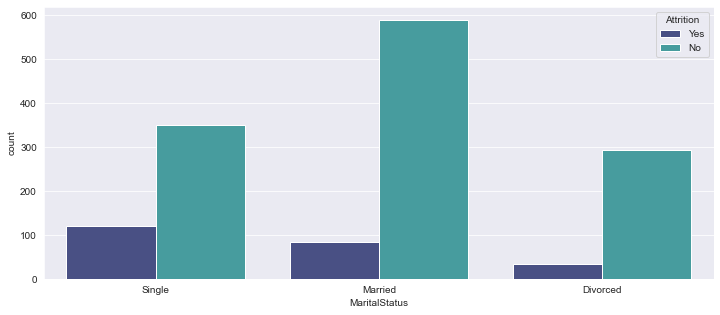

In [48]:
plt.figure(figsize=(12,5))
sns.countplot(x='MaritalStatus', hue = 'Attrition', palette = 'mako',data =df )

#### Employee count for single category is larger than divorced and attrition rate is highest among all three

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

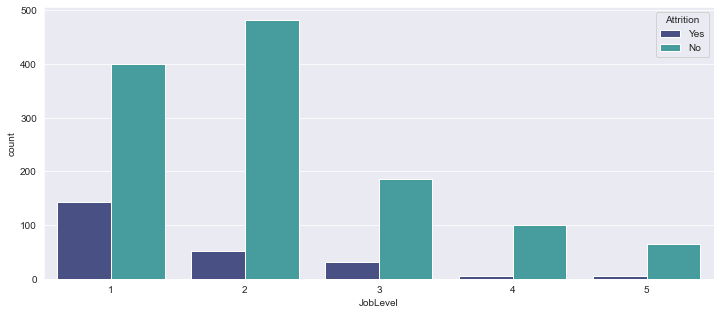

In [49]:
plt.figure(figsize=(12,5))
sns.countplot(x='JobLevel', hue = 'Attrition', palette = 'mako',data =df )

#### Employees of the joblevel 1 are attrited highest

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

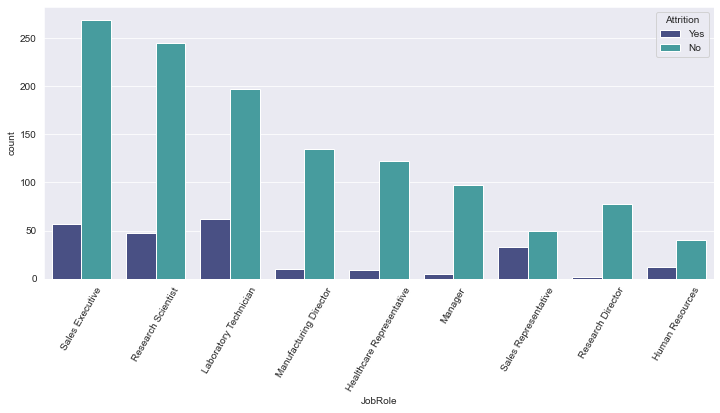

In [50]:
plt.figure(figsize=(12,5))
sns.countplot(x='JobRole', hue = 'Attrition', palette = 'mako',data =df )
plt.xticks(rotation = 60)

#### Lab Technician & Sales Executives are highest attrited

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

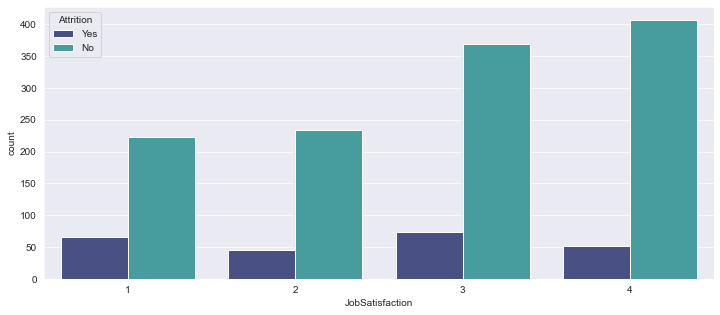

In [51]:
plt.figure(figsize=(12,5))
sns.countplot(x='JobSatisfaction', hue = 'Attrition', palette = 'mako',data =df )

#### Employees with jobsatisfaction of point 3 are attrited more rather than the employee with jobsatisfaction at 1

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

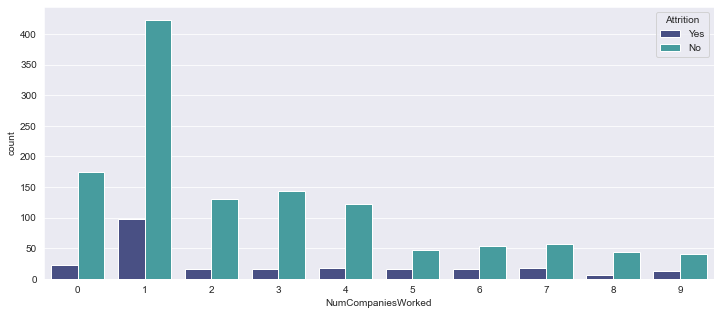

In [52]:
plt.figure(figsize=(12,5))
sns.countplot(x='NumCompaniesWorked', hue = 'Attrition',data =df,palette = 'mako' )

#### Employees who has worked with only one companies are redundant highest

<AxesSubplot:xlabel='OverTime', ylabel='count'>

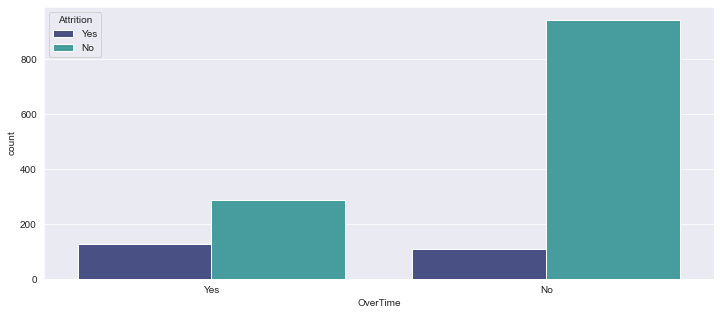

In [53]:
plt.figure(figsize=(12,5))
sns.countplot(x='OverTime', hue = 'Attrition', palette = 'mako',data =df )

#### Employee from both categories are attrited somewhat equally

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

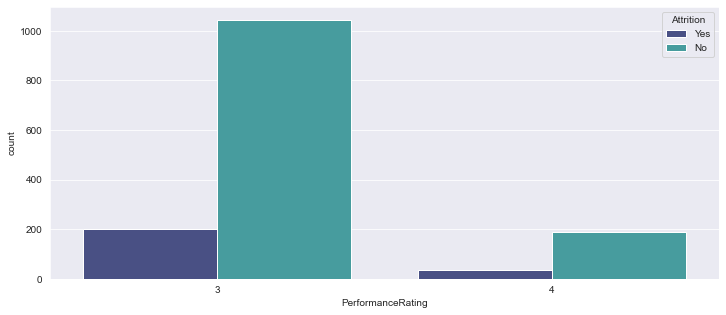

In [54]:
plt.figure(figsize=(12,5))
sns.countplot(x='PerformanceRating', hue = 'Attrition', palette = 'mako',data =df )

#### Fair Enough! Lower performance rater are attrited higher

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

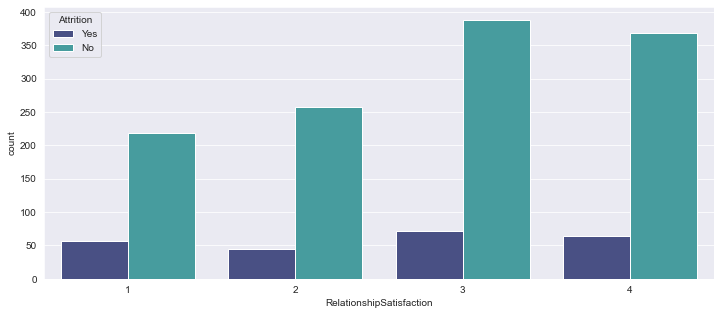

In [55]:
plt.figure(figsize=(12,5))
sns.countplot(x='RelationshipSatisfaction', hue = 'Attrition', palette = 'mako',data =df )

#### Employee with satisfactory relation of 3&4 are attrited more than lower relationship

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '

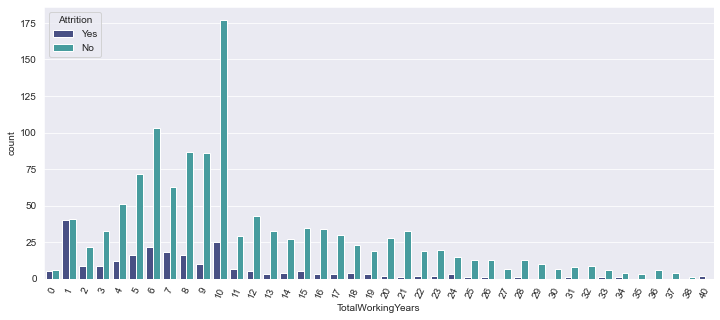

In [56]:
plt.figure(figsize=(12,5))
sns.countplot(x='TotalWorkingYears', hue = 'Attrition', palette = 'mako',data =df )
plt.xticks(rotation = 65)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

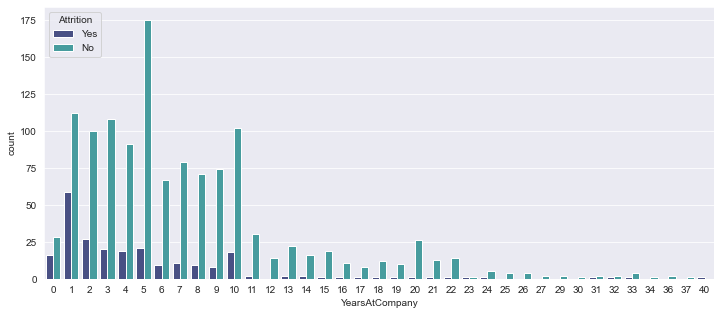

In [57]:
plt.figure(figsize=(12,5))
sns.countplot(x='YearsAtCompany', hue = 'Attrition', palette = 'mako',data =df )

#### Emoloyees who have worked/working for 1year have the highest attrition. Also there is considerable no. of employees who have worked for 10years are attrited

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

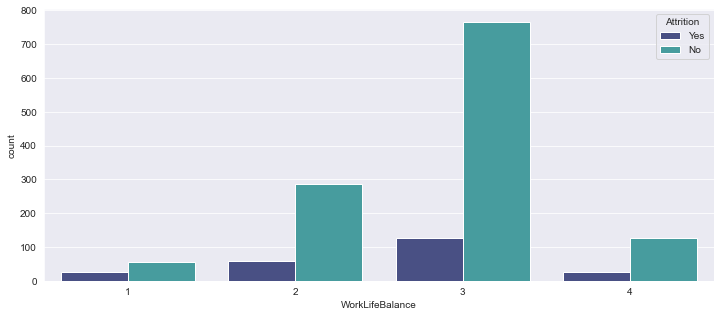

In [58]:
plt.figure(figsize=(12,5))
sns.countplot(x='WorkLifeBalance', hue = 'Attrition', palette = 'mako',data =df )

#### Employees who rated work-life balance at 3 are attrited highest

<ipython-input-59-7dd9bc216ede>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,6))


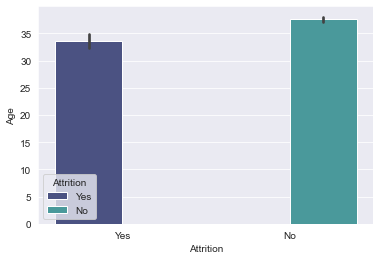

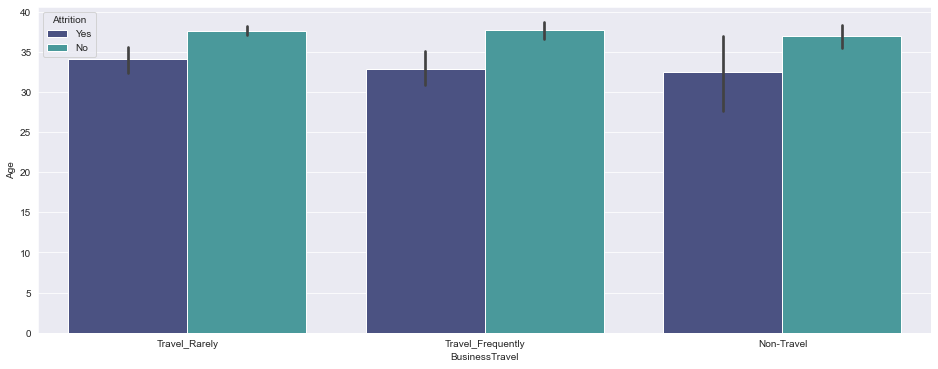

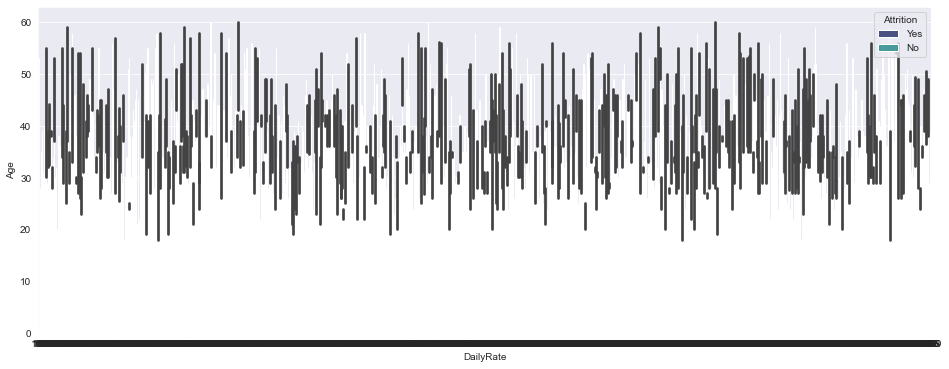

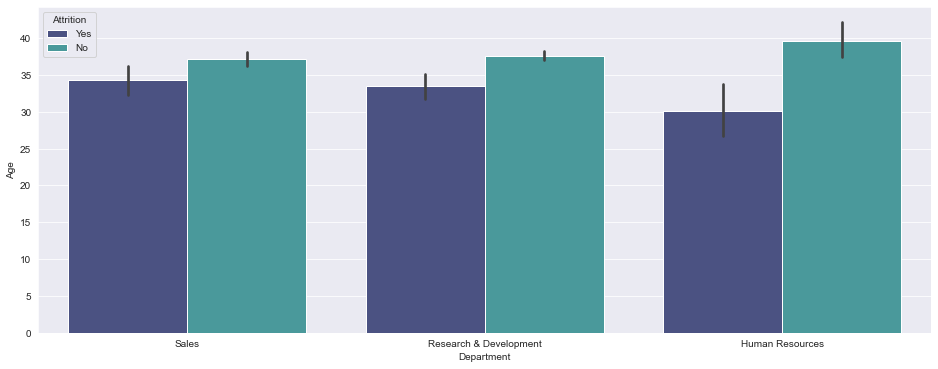

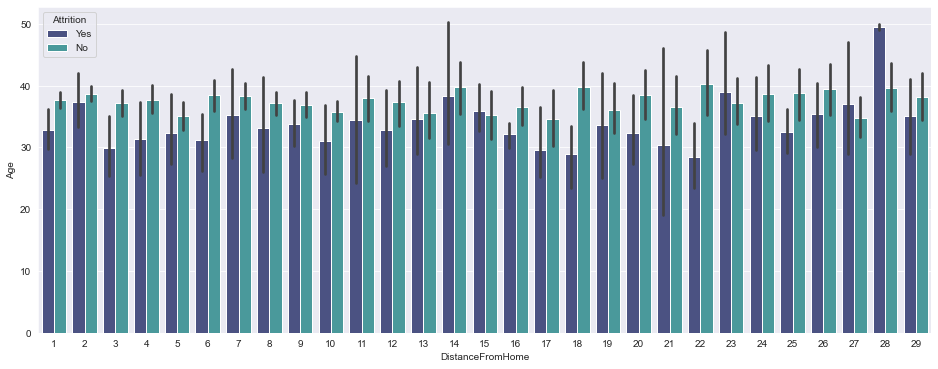

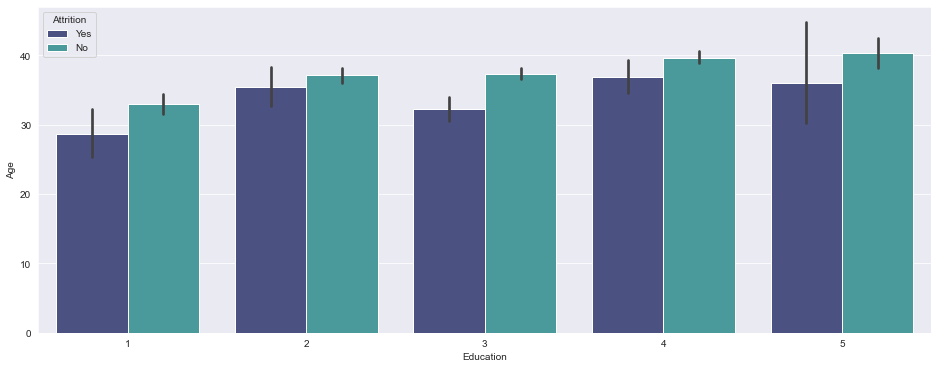

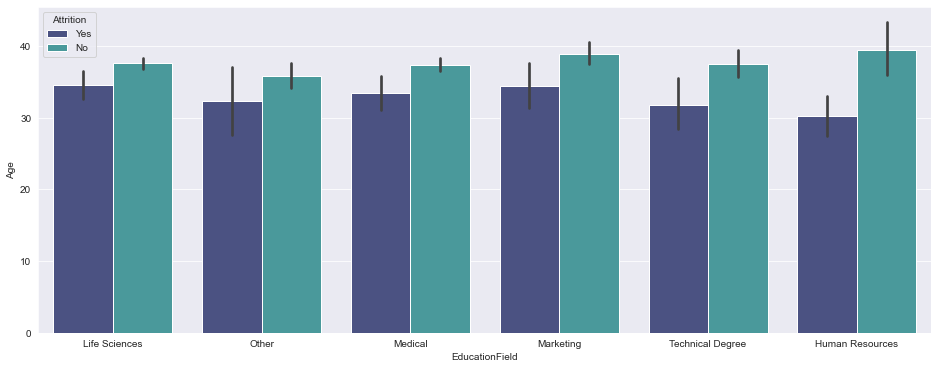

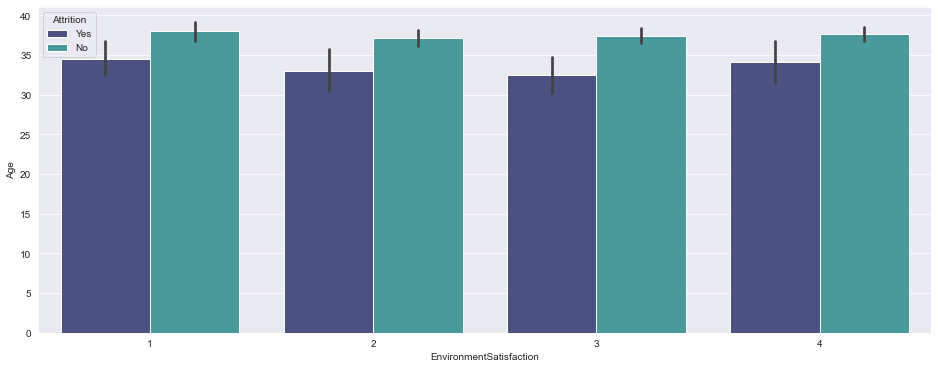

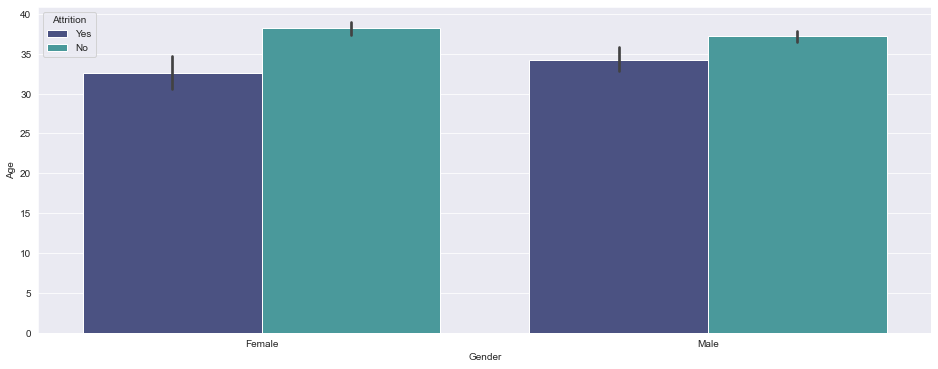

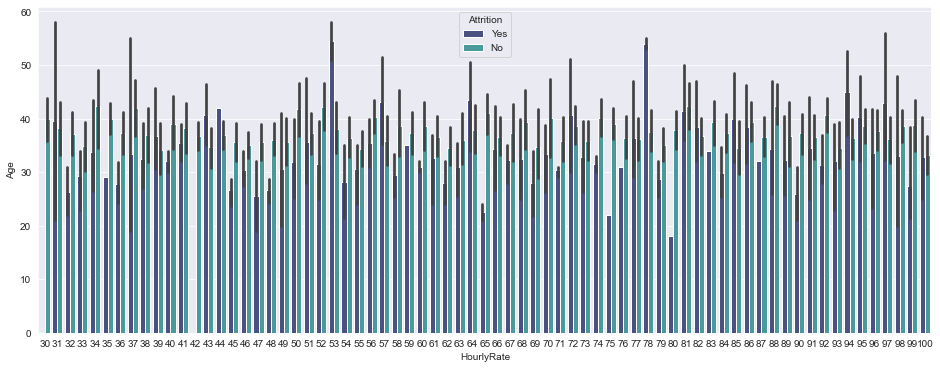

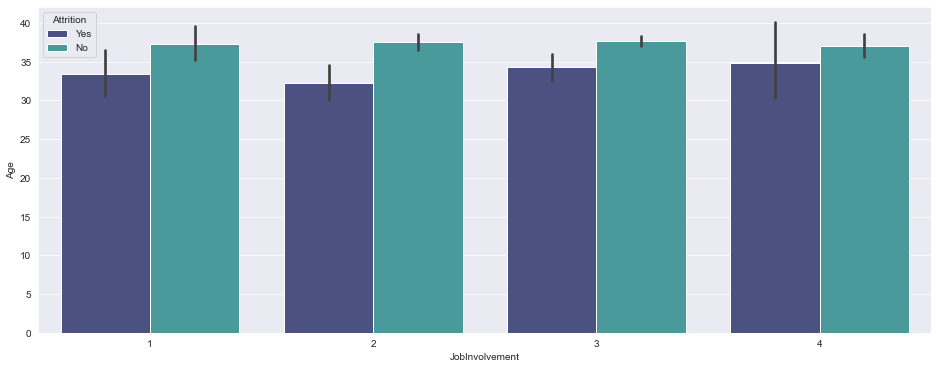

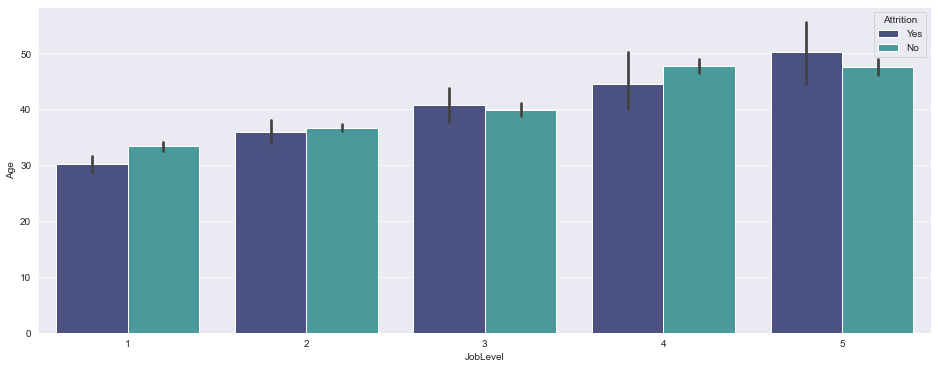

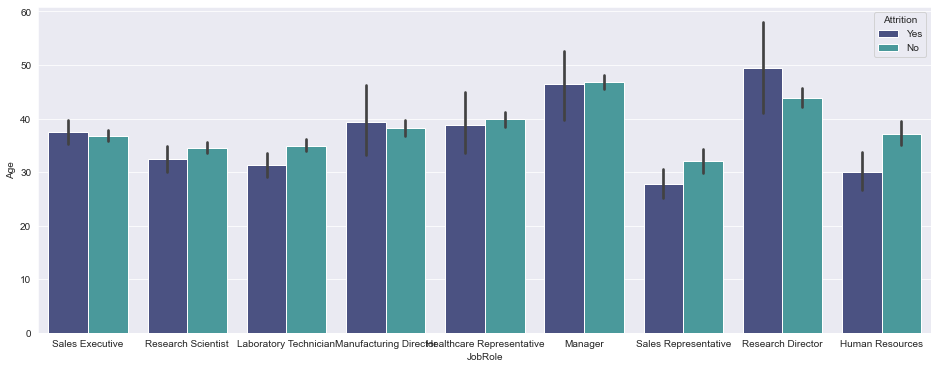

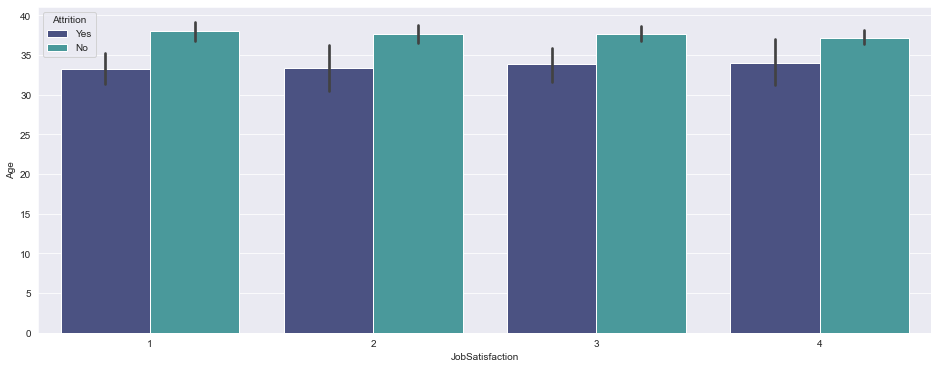

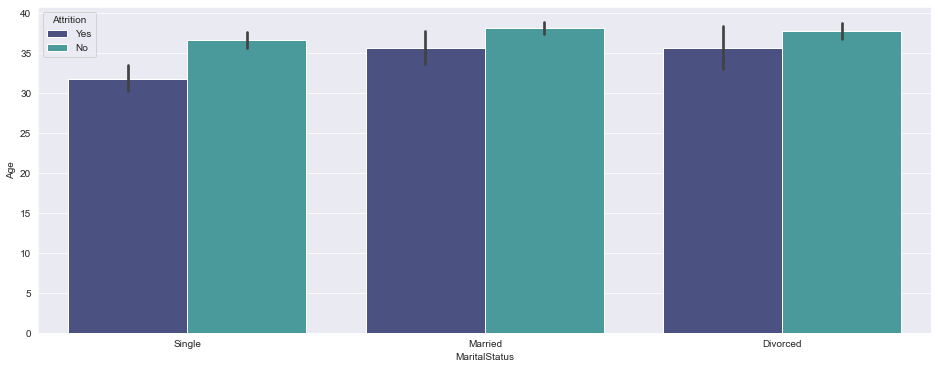

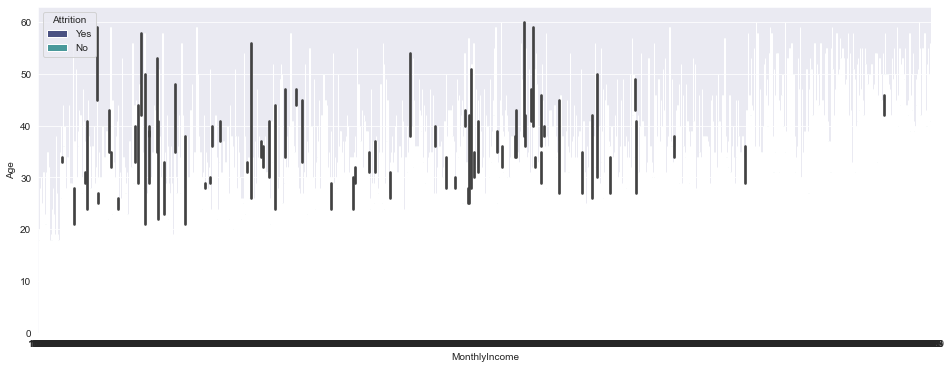

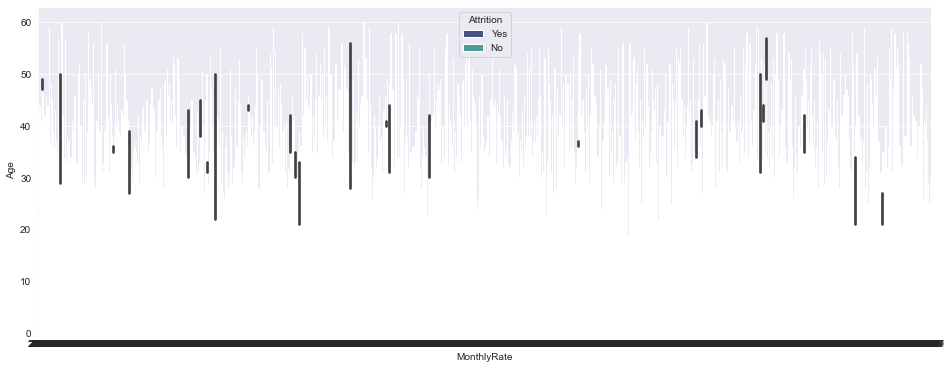

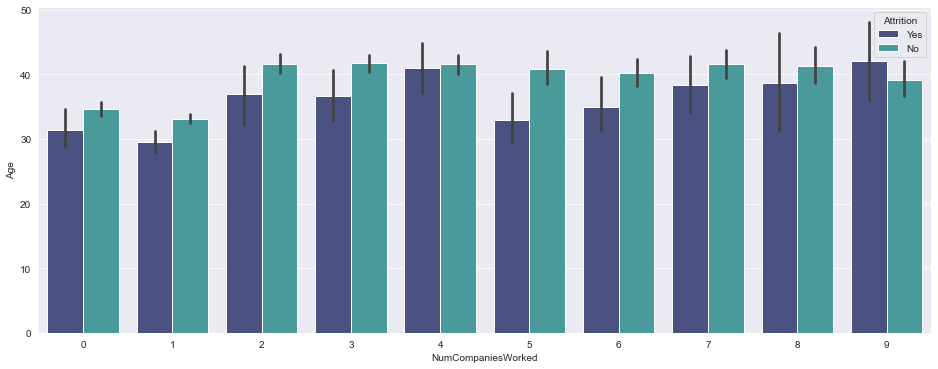

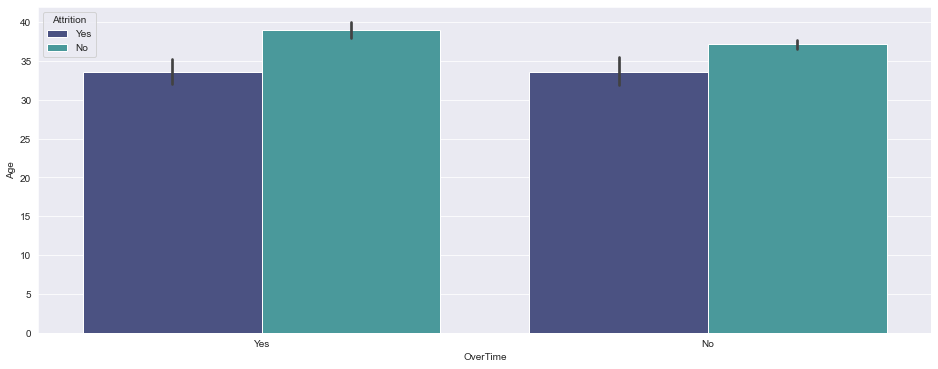

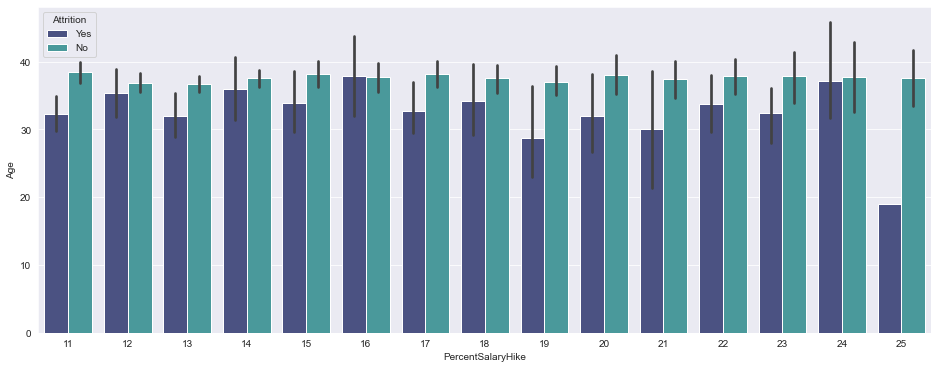

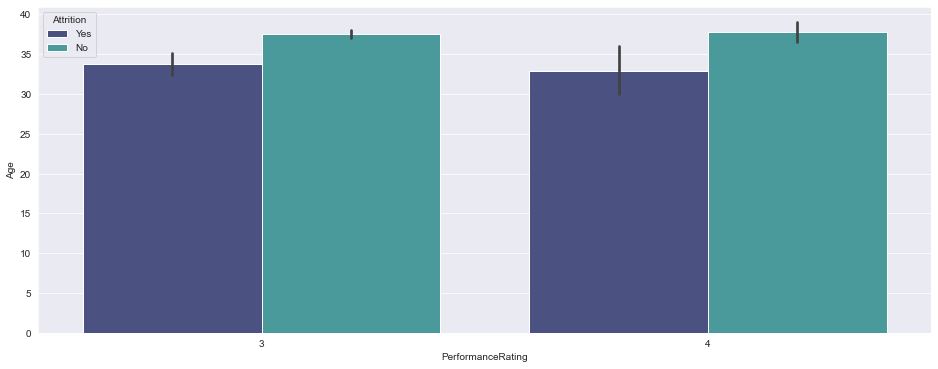

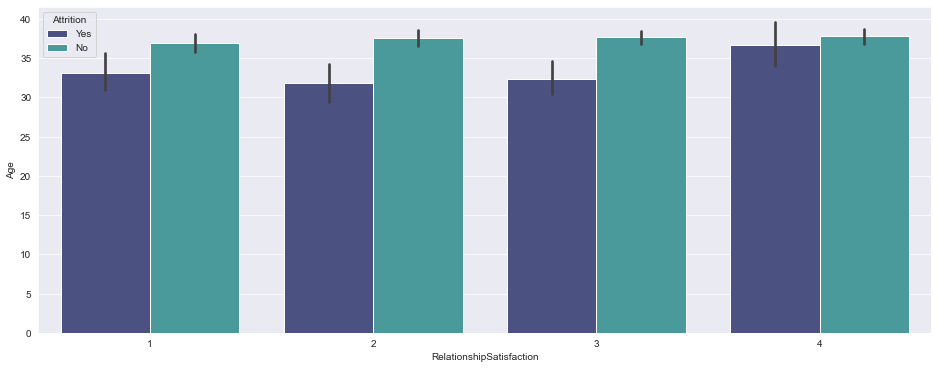

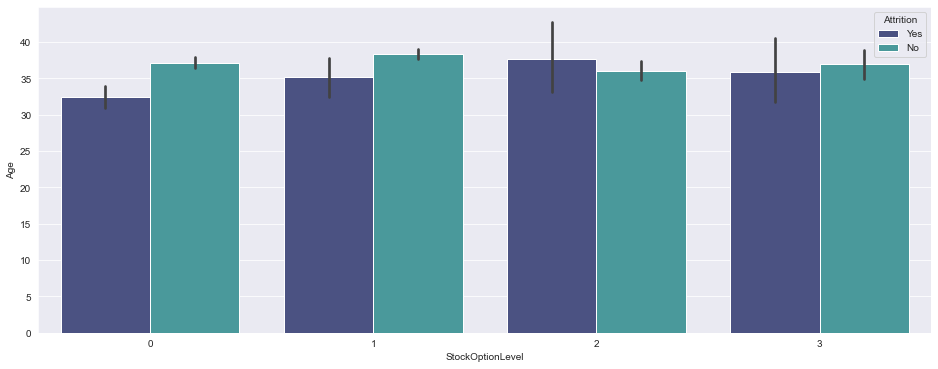

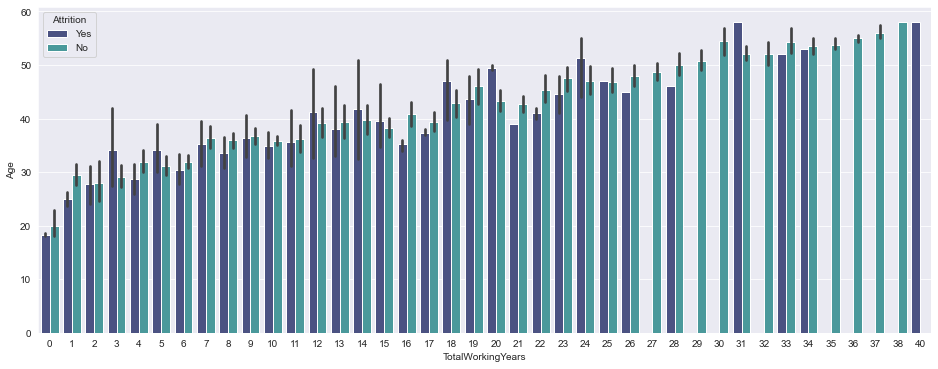

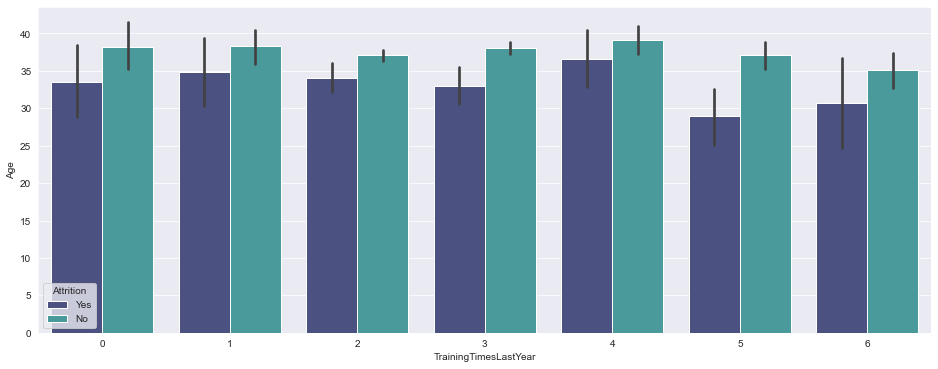

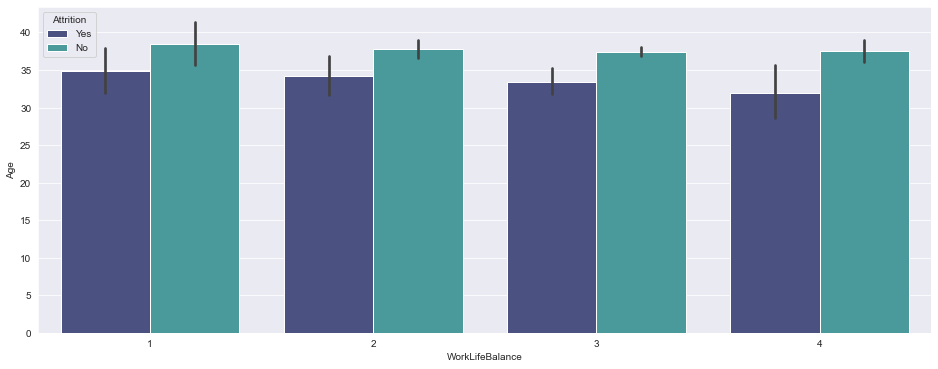

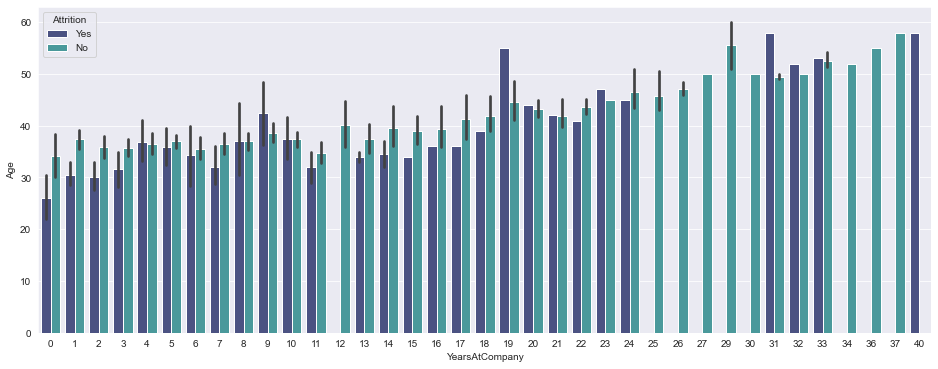

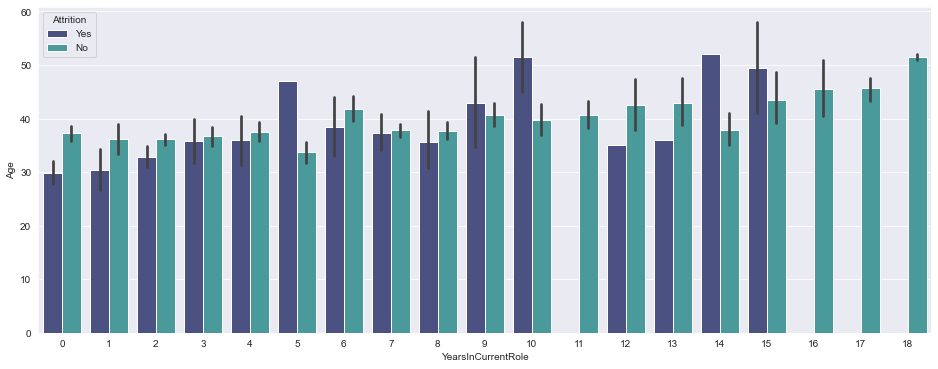

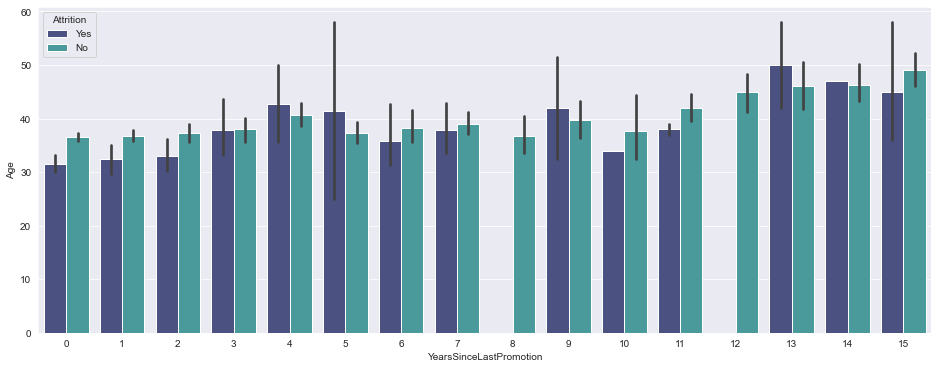

<Figure size 1152x432 with 0 Axes>

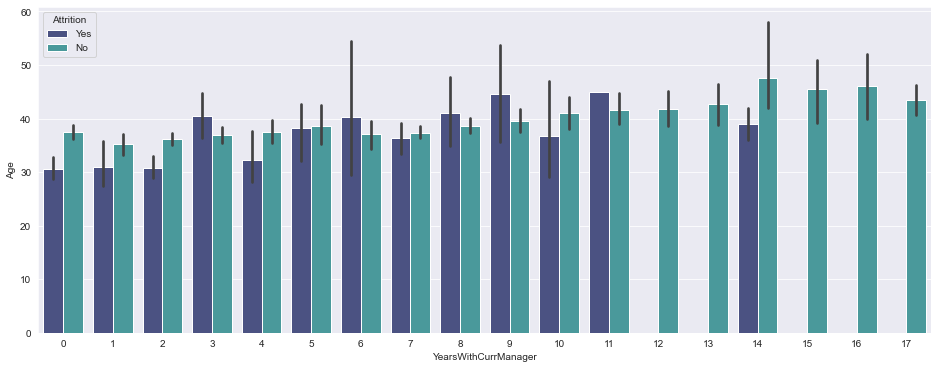

In [59]:
for i,cols in enumerate(df.columns[1:]):
    plt.figure(figsize=(16,6))
    plt.figure(i)
    sns.barplot(x = cols, y = 'Age', data = df, hue = 'Attrition', palette = 'mako', saturation = 0.7)

#### Insights:
    1. Even the employees of age>30 has been attrited
    2. The people living at distant are likely to be attrited than retained
    3. There are employees >30yrs & envrionmentsatisfaction of 4 have been attrited
    4. Employees having age >45's and joblevel of 4-5 being attrited
    5. ResearchDirector have the employees with the age of around 50's and been attrited
    6. Employees with age>40 and having worked for 9 different companied are attrited
    7. There exist employees who has worked for 19yrs & 31yrs are attrited. Employees working for 25-30yrs& 34-37yrs have not been attrited
  

<AxesSubplot:xlabel='Age', ylabel='count'>

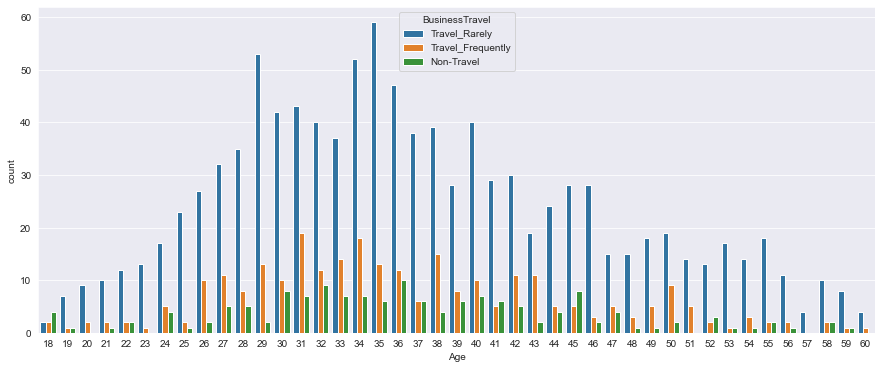

In [60]:
plt.figure(figsize=(15,6))
sns.countplot(hue = 'BusinessTravel', data =df, x='Age')

#### Employees within the range of age 29-36yrs travels freuquently than the rest of the age-group

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

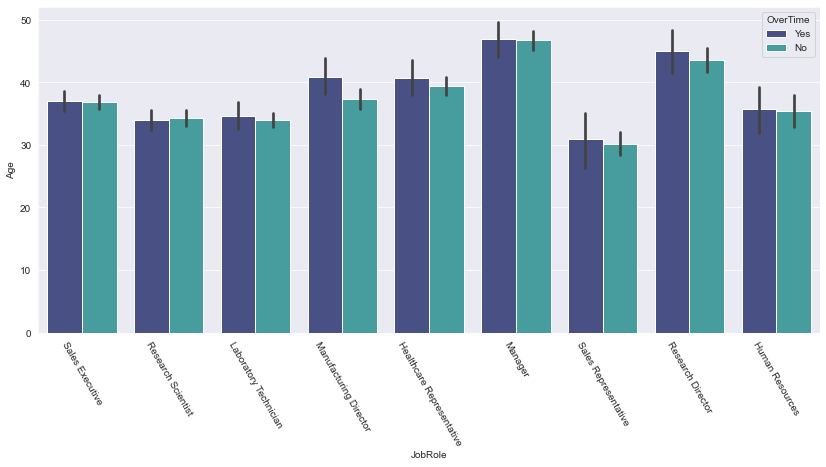

In [61]:
#Job role vs Overtime
plt.figure(figsize = (14,6))
sns.barplot(x = 'JobRole', y = 'Age',hue = 'OverTime', data = df, palette = 'mako')
plt.xticks(rotation = -60)

#### Each JobRole consist of employees doing overtime

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

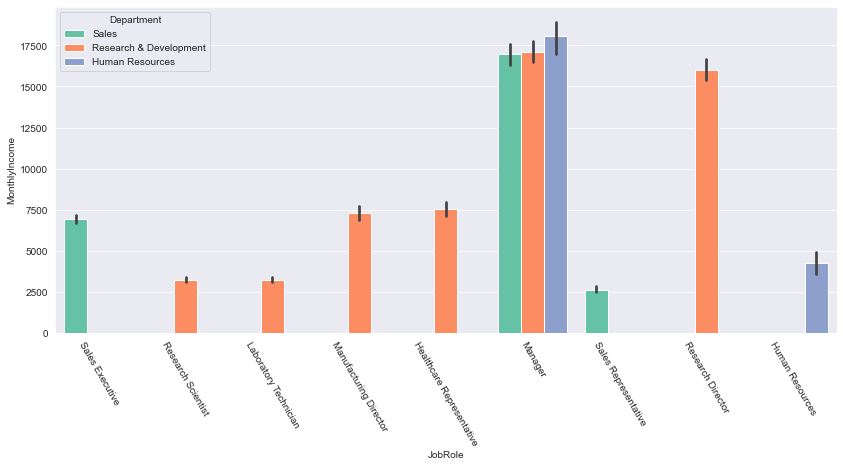

In [62]:
plt.figure(figsize = (14,6))
sns.barplot(x = 'JobRole', y = 'MonthlyIncome',hue = 'Department', data = df, palette = 'Set2', saturation = 1.3)
plt.xticks(rotation = -60)

#### Income of the Manager of all dept. is Highest. Lowest Income is of the Sales Representative

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

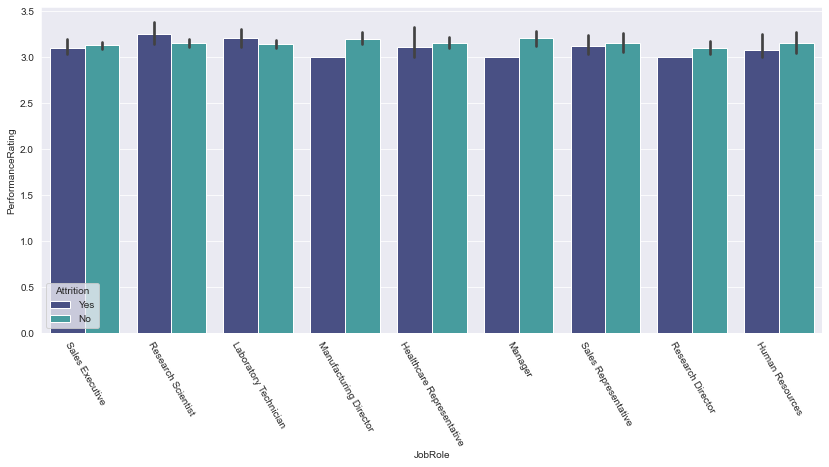

In [63]:
plt.figure(figsize = (14,6))
sns.barplot(x = 'JobRole', y = 'PerformanceRating',hue = 'Attrition', data = df, palette = 'mako')
plt.xticks(rotation = -60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

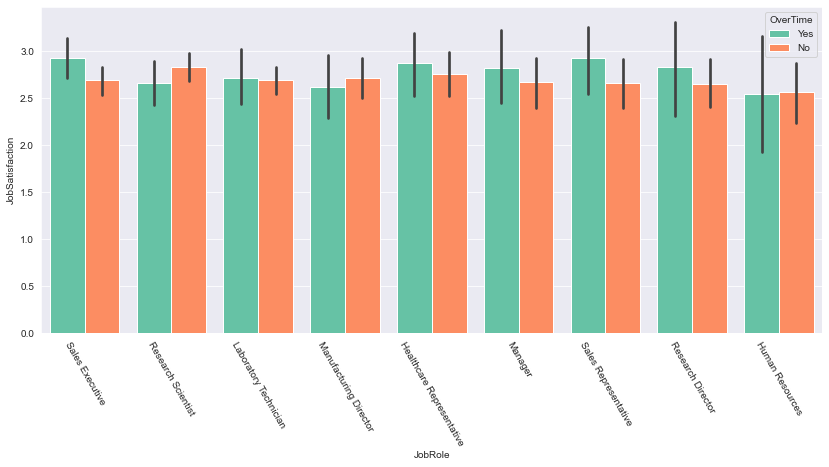

In [64]:
plt.figure(figsize = (14,6))
sns.barplot(x = 'JobRole', y = 'JobSatisfaction',hue = 'OverTime', data = df, palette = 'Set2',saturation = 1.5)
plt.xticks(rotation = -60)

#### Overtimes in Sales Representative is more along with Jobsatisfaction

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

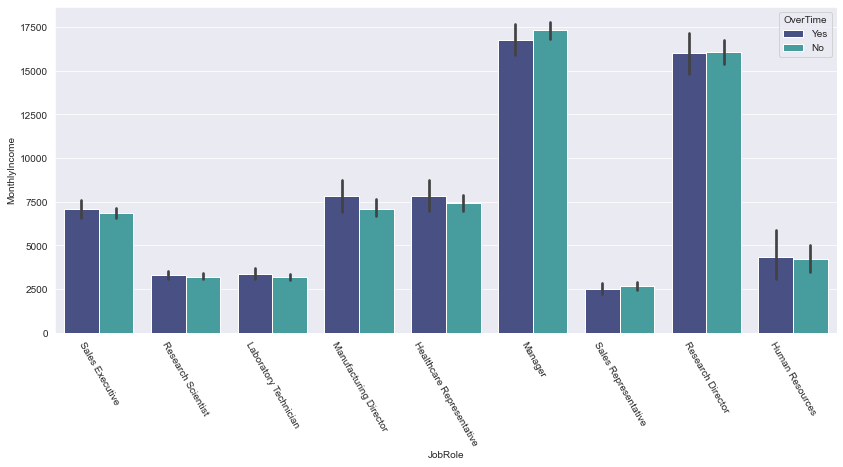

In [65]:
plt.figure(figsize = (14,6))
sns.barplot(x = 'JobRole', y = 'MonthlyIncome',hue = 'OverTime', data = df, palette = 'mako')
plt.xticks(rotation = -60)

#### MonthlyIncome for the manager without overtime is Highest. The least income is represented in sales

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

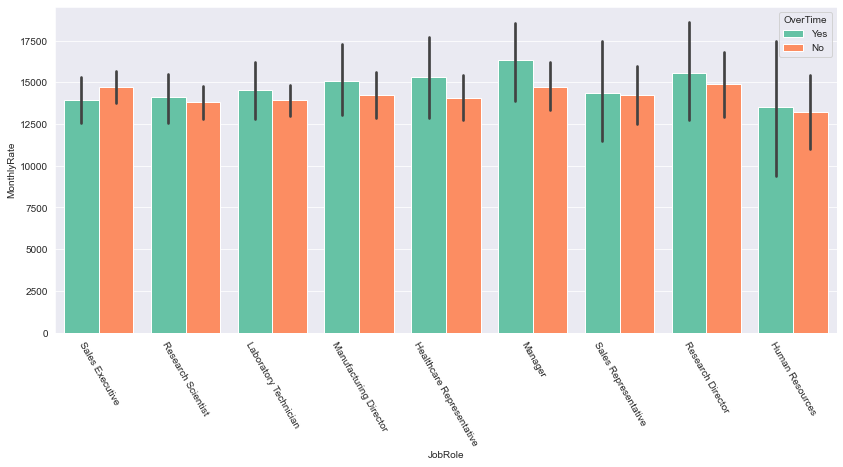

In [66]:
plt.figure(figsize = (14,6))
sns.barplot(x = 'JobRole', y = 'MonthlyRate',hue = 'OverTime', data = df, palette = 'Set2', saturation = 1.5)
plt.xticks(rotation = -60)

#### Once again, monthlyrate for managers &research director is higher. Rest all the roles have the near equal rates

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

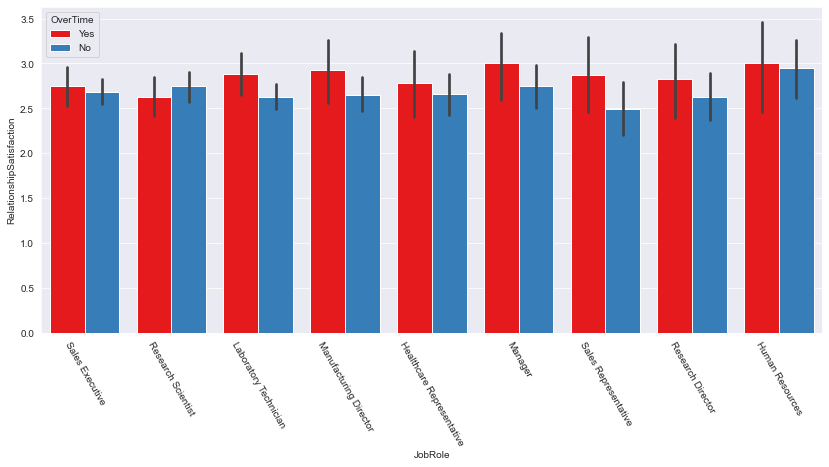

In [67]:
plt.figure(figsize = (14,6))
sns.barplot(x = 'JobRole', y = 'RelationshipSatisfaction',hue = 'OverTime', data = df, palette = 'Set1', saturation = 1.5)
plt.xticks(rotation = -60)

#### RelationshipSatisfaction for employees doing overtime are higher than non-overtimer. HR has highest satisfaction rate while research Scientist has lowest

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

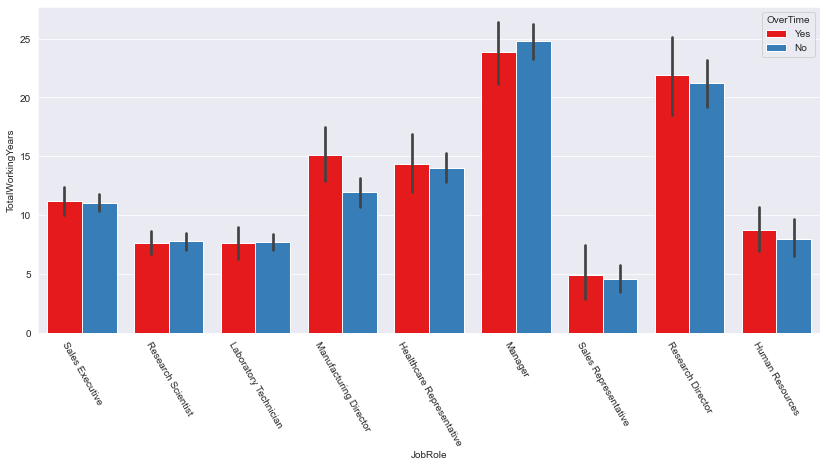

In [68]:
plt.figure(figsize = (14,6))
sns.barplot(x = 'JobRole', y = 'TotalWorkingYears',hue = 'OverTime', data = df, palette = 'Set1', saturation = 1.5)
plt.xticks(rotation = -60)

#### Managers have worked for more number of years than any other employee in roles. Salesrepresentative have worked the least amount of years in the company

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

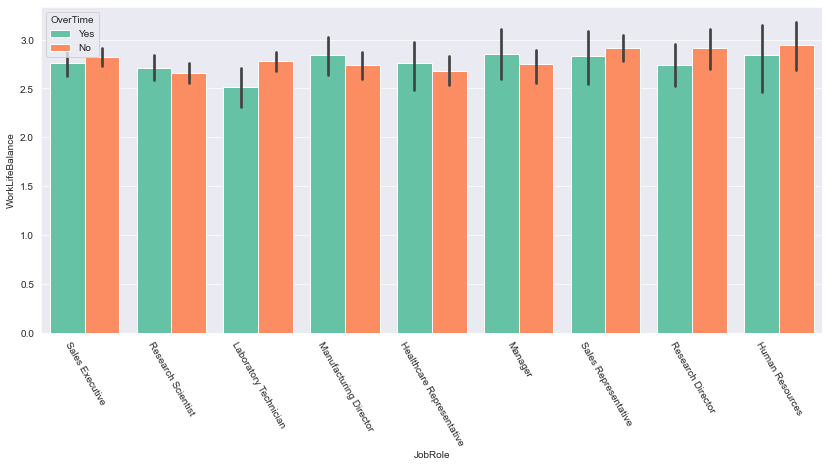

In [69]:
plt.figure(figsize = (14,6))
sns.barplot(x = 'JobRole', y = 'WorkLifeBalance',hue = 'OverTime', data = df, palette = 'Set2', saturation = 1.5)
plt.xticks(rotation = -60)

### WorkLifeBalance are near equal for all the jobroles

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

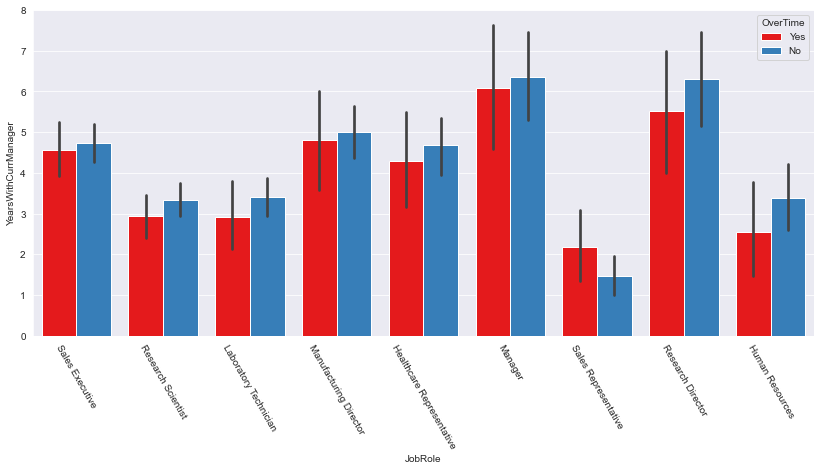

In [70]:
plt.figure(figsize = (14,6))
sns.barplot(x = 'JobRole', y = 'YearsWithCurrManager',hue = 'OverTime', data = df, palette = 'Set1', saturation = 1.5)
plt.xticks(rotation = -60)

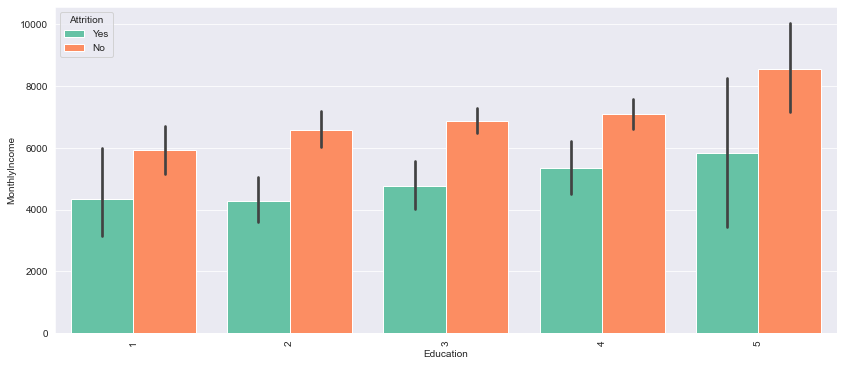

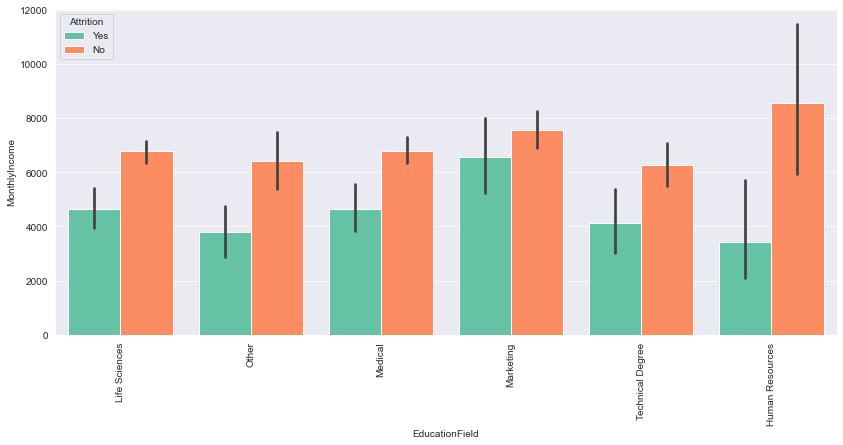

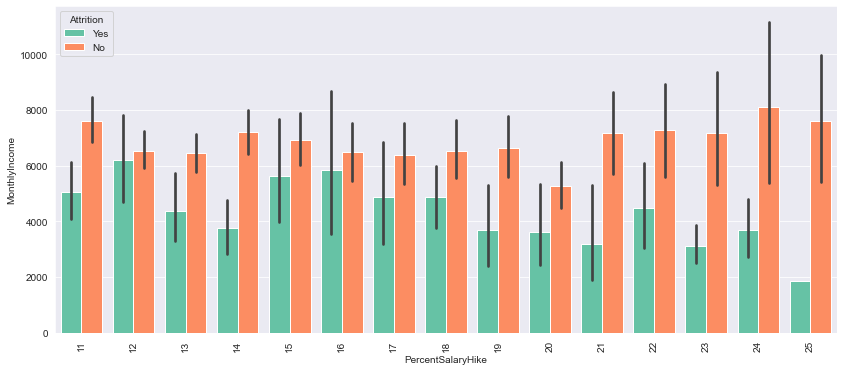

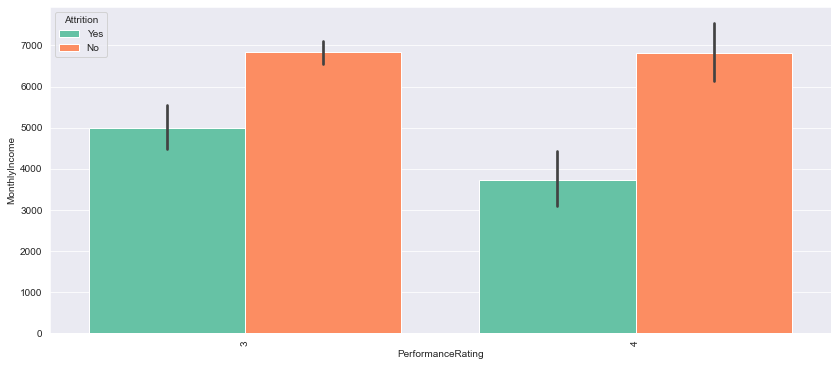

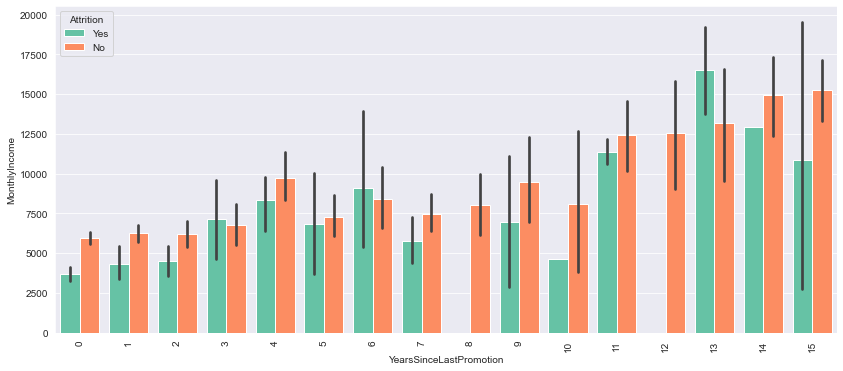

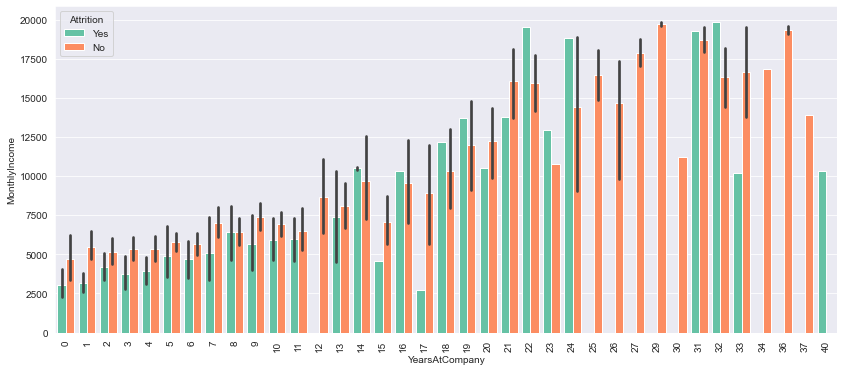

In [71]:
tier1 = ['Education','EducationField','PercentSalaryHike','PerformanceRating','YearsSinceLastPromotion',
         'YearsAtCompany']
for i in tier1:
    plt.figure(figsize=(14,6))
    sns.barplot(x = df[i], y='MonthlyIncome', hue = 'Attrition', data = df, palette = 'Set2', saturation = 1.4)
    plt.xticks(rotation = 90)

#### Observation:
    1. Employees within the performance rating of 4 and monthly income <4000 are attrited
    2. Employees who worked for 8 & 13yrs are not attrited. Employees whose monthly income is less than their counterparts are attrited. Do direct relation can be observed between Income and attrition.
    3. Income is also linearly proportional to yearsatcompany. Some employees despite having monthly salary >17500 are attrited.
    4. Despite having salaryhike >20%, employees are attrited. There exist employees whose hike is >20% but still monthly income is <4000 are attrited.

## Correlation Matrix

<AxesSubplot:>

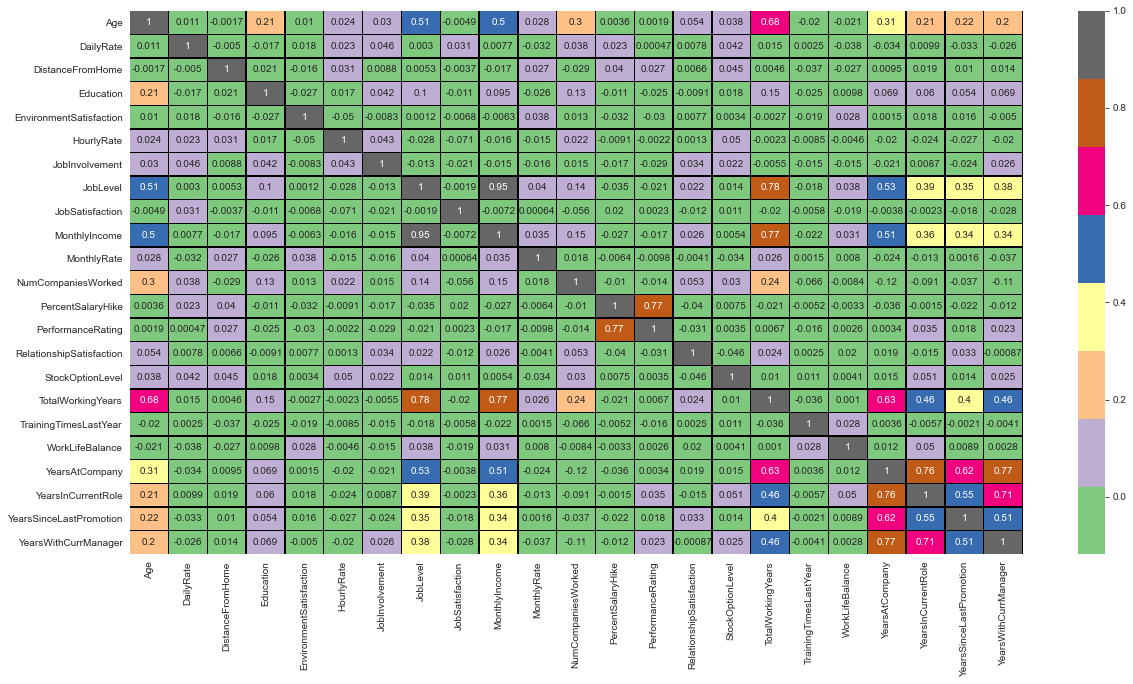

In [72]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot= True, linecolor='black',linewidths=0.4, cmap='Accent' )

#### Observation:
    1. JobLevel & WorkingYears are correlated
    2. Yrs@Company & YrsWithManager have 77% correlation. Alos it has 62% & 76% correlation with Promotion & YearsInCurrentRole
    3. MonthlyIncome & WorkingYears have 77% correlation
    4. SalaryHike & PerformanceRating is 77% correlated
    5. WorkingYears is 77% correlated with MonthlyIncome
    6. Age & WorkingYears are 68% correlated
Most of the features are minorly correlated with each other

In [73]:
tier2 = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate','Department','DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender','JobInvolvement','JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome','NumCompaniesWorked', 'OverTime','PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 
         'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager' ]

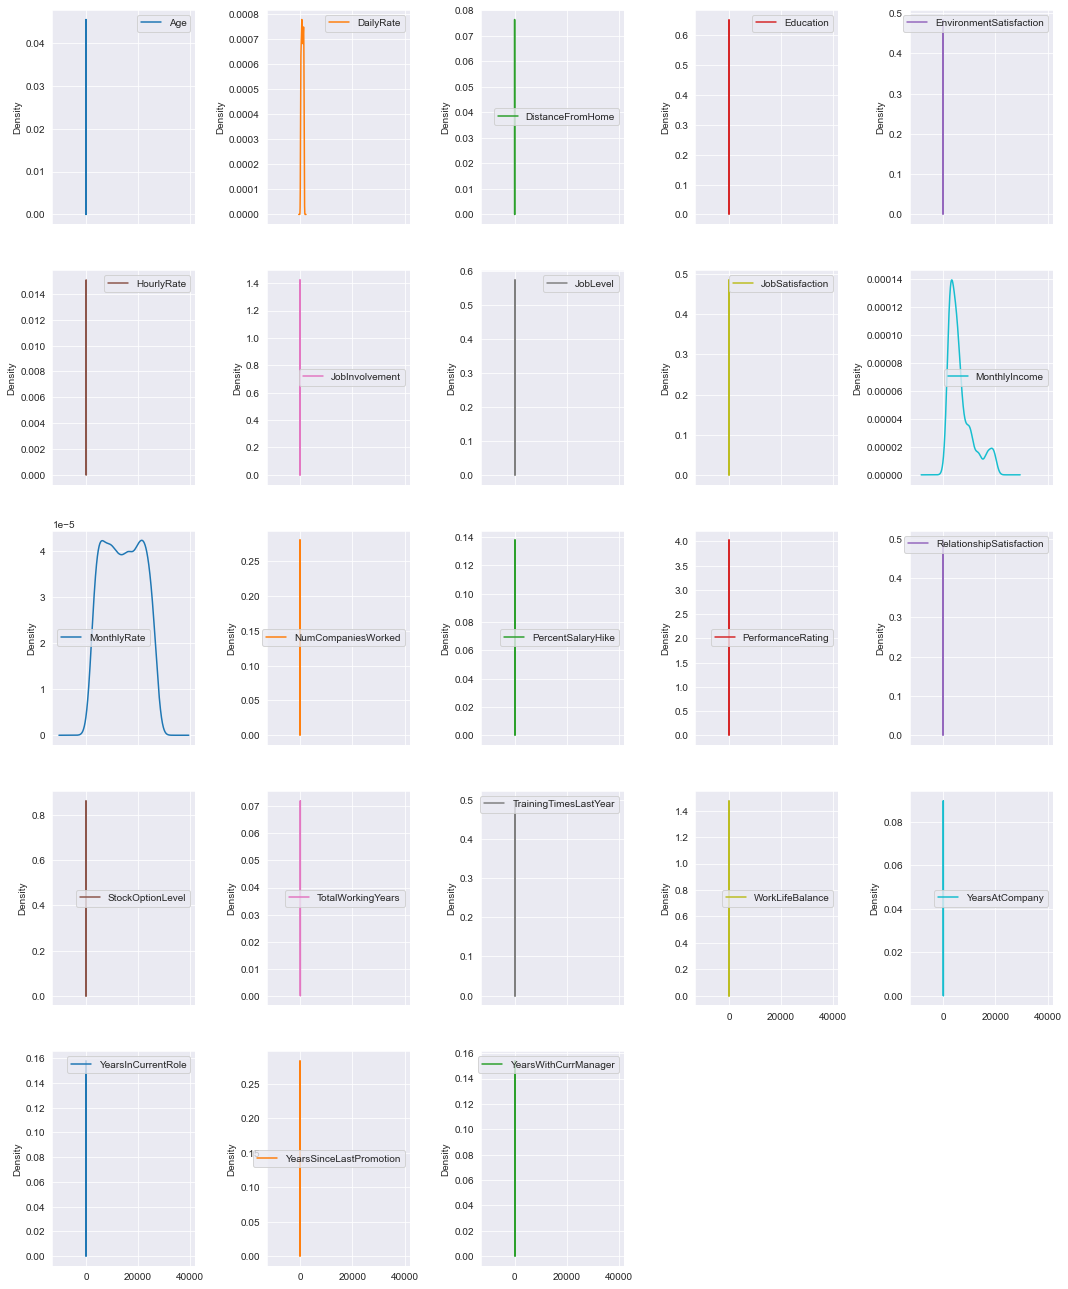

In [74]:
df.plot(kind='kde', subplots=True, layout=(7,5), figsize=(15,25))
plt.tight_layout(pad=1,w_pad=1.5,h_pad=3)

#### Improper density estimate is visible in MonthlyRate & MonthlyIncome

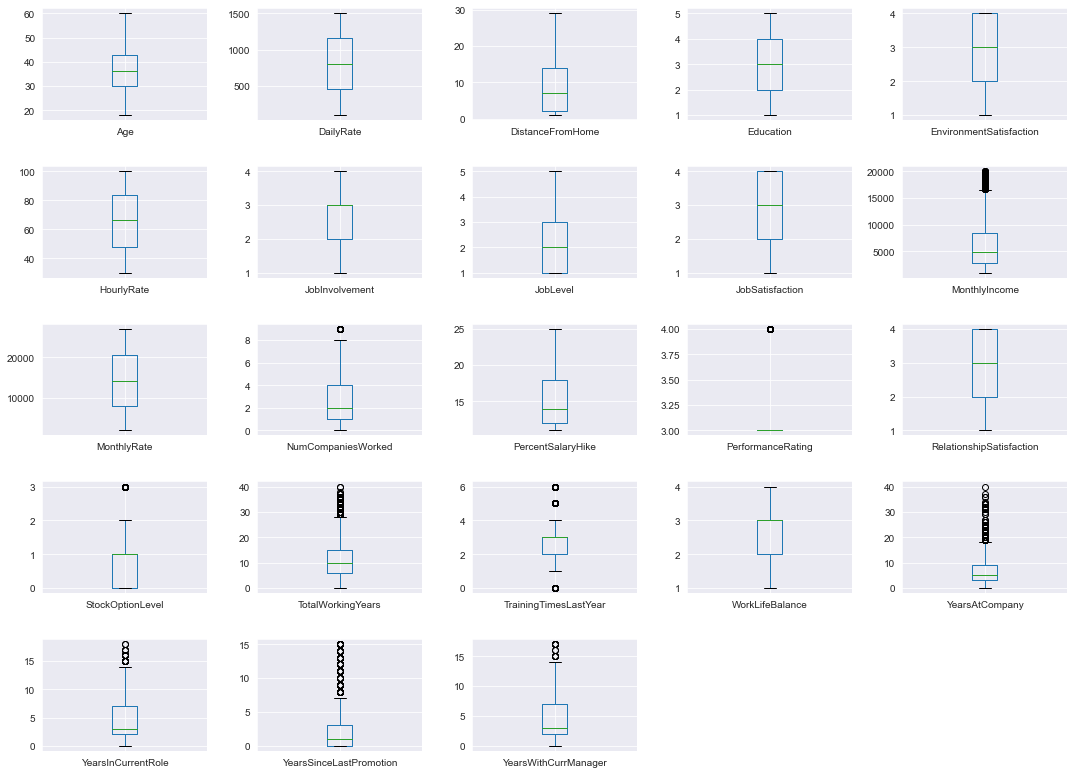

In [75]:
df.plot(kind='box', subplots=True, layout=(7,5), figsize=(15,15))
plt.tight_layout(pad=1,w_pad=1.5,h_pad=3)

#### We see several outliers is present but they are not really implicated as outliers becuase of the fact that they withhold relation with target variable and removing them might disrupt the model prediction.

## Data Preprocessing

In [76]:
#we can stockoptionlevel because it does not make sense that stockoption has anything to do with employee attrition
df.drop(['StockOptionLevel'],axis=1, inplace = True)

In [77]:
#LabelEncoding Attrition
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Attrition'] = le.fit_transform(df['Attrition'])

In [78]:
for i in df.columns:
    if df[i].dtype == np.number:
        continue
    else:
        df[i] = le.fit_transform(df[i])

<ipython-input-78-b6733d085963>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[i].dtype == np.number:


In [79]:
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrM

In [80]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
TotalWorkingYears           1.112899
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.676650
Y

#### Considering the skewness limit of [-1,1], we have features who are offending limit are ['BusinessTrvael','JobLevel','NumcompaniesWorked','PerformanceRating','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion']

In [81]:
#applying logtransformation to the columns with high skewness
df['BusinessTravel'] = np.log1p(df['BusinessTravel'])
df['JobLevel'] = np.log1p(df['JobLevel'])
df['NumCompaniesWorked'] = np.log1p(df['NumCompaniesWorked'])
df['PerformanceRating'] = np.log1p(df['PerformanceRating'])
df['TotalWorkingYears'] = np.log1p(df['TotalWorkingYears'])
df['YearsAtCompany'] = np.log1p(df['YearsAtCompany'])
df['YearsSinceLastPromotion'] = np.log1p(df['YearsSinceLastPromotion'])

In [82]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.815861
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.219763
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          0.092896
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
TotalWorkingYears          -0.622798
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.216883
Y

In [83]:
#still the high skewness is present in BusinessTravel, PerformanceRating, Attrition
df['BusinessTravel'] = np.log1p(df['BusinessTravel'])
df['PerformanceRating'] = np.log1p(df['PerformanceRating'])
df['Attrition'] = np.log1p(df['Attrition'])

#### Skewness value is stable and now we unable to change

In [84]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,0.693147,0.741276,624,2,0,1,1,1,0,...,0,0.000000,0,2.197225,0,0,1.945910,4,0.000000,5
1,31,0.000000,0.526589,113,1,7,0,1,2,1,...,12,0.526589,3,2.397895,3,2,2.397895,7,0.693147,7
2,19,0.693147,0.741276,805,1,1,1,4,3,1,...,4,0.000000,1,2.079442,3,2,0.000000,0,0.000000,0
3,15,0.000000,0.526589,820,1,2,3,1,3,0,...,0,0.000000,2,2.197225,3,2,2.197225,7,1.386294,0
4,9,0.000000,0.741276,312,1,1,0,3,0,1,...,1,0.000000,3,1.945910,3,2,1.098612,2,1.098612,2


## Splitting Dataset

In [85]:
x = df.drop(['Attrition'],axis=1)
Y=df['Attrition']

In [86]:
#We need to scale the values of features to identical range
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(x)

array([[ 0.4463504 ,  0.51268494,  0.71391447, ..., -0.0632959 ,
        -0.97334237,  0.24583399],
       [ 1.32236521, -0.43539053, -1.30244563, ...,  0.76499762,
        -0.11727147,  0.80654148],
       [ 0.008343  ,  0.51268494,  1.42812421, ..., -1.16768726,
        -0.97334237, -1.15593471],
       ...,
       [-1.08667552,  0.51268494, -1.59444298, ..., -0.61549158,
        -0.97334237, -0.31487349],
       [ 1.32236521, -0.43539053,  0.53634851, ...,  0.48889978,
        -0.97334237,  1.08689522],
       [-0.32016256,  0.51268494, -0.42250766, ..., -0.33939374,
        -0.11727147, -0.59522723]])

In [87]:
X = pd.DataFrame(x, columns = x.columns)

In [88]:
Y.head()

0    0.693147
1    0.000000
2    0.693147
3    0.000000
4    0.000000
Name: Attrition, dtype: float64

In [89]:
#we need to convert target variable to categorical input 
Y = le.fit_transform(Y)

## Modelling Data

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [91]:
log_reg = LogisticRegression()
for i in range(30,90):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = i)
    log_reg.fit(X_train,Y_train)
    reg_pred = log_reg.predict(X_test)
    print('At random state:',i)
    print('Model Prediction on Training dataset:',round(log_reg.score(X_train,Y_train)*100,2))
    print('Model Prediction on Test Dataset:',round(accuracy_score(Y_test,reg_pred)*100,2))
    print(confusion_matrix(Y_test,reg_pred))
    print('\n')

At random state: 30
Model Prediction on Training dataset: 85.93
Model Prediction on Test Dataset: 85.05
[[302   5]
 [ 50  11]]


At random state: 31
Model Prediction on Training dataset: 84.94
Model Prediction on Test Dataset: 86.14
[[308   9]
 [ 42   9]]


At random state: 32
Model Prediction on Training dataset: 85.93
Model Prediction on Test Dataset: 83.42
[[302   4]
 [ 57   5]]


At random state: 33
Model Prediction on Training dataset: 85.03
Model Prediction on Test Dataset: 83.97
[[305   1]
 [ 58   4]]


At random state: 34
Model Prediction on Training dataset: 84.94
Model Prediction on Test Dataset: 86.14
[[310   4]
 [ 47   7]]


At random state: 35
Model Prediction on Training dataset: 84.66
Model Prediction on Test Dataset: 88.04
[[317   1]
 [ 43   7]]


At random state: 36
Model Prediction on Training dataset: 85.75
Model Prediction on Test Dataset: 83.97
[[299  10]
 [ 49  10]]


At random state: 37
Model Prediction on Training dataset: 85.66
Model Prediction on Test Dataset:

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
#we can take random_state 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
log_reg.fit(X_train,Y_train)
reg_pred = log_reg.predict(X_test)
print('Accuracy Score', accuracy_score(Y_test,reg_pred))

cv_score = cross_val_score(log_reg, X, Y, scoring='accuracy',cv=5)
print('CV Score:', np.mean(cv_score))

print(confusion_matrix(Y_test,reg_pred))
print(classification_report(Y_test,reg_pred))


Accuracy Score 0.875
CV Score: 0.8544217687074829
[[317   3]
 [ 43   5]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.62      0.10      0.18        48

    accuracy                           0.88       368
   macro avg       0.75      0.55      0.56       368
weighted avg       0.85      0.88      0.83       368



In [94]:
#model prediction on train dataset
log_reg.score(X_train,Y_train)

0.852994555353902

# Parameter Tuning & Cross validation

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [96]:
def cv_score(model):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    print('Accuracy on training set: ', model.score(X_train, Y_train))
    print('Accuracy on validation set: ', accuracy_score(Y_test,y_pred))
    
    score = cross_val_score(model,X, Y)
    print('CV score: ', np.mean(score))
    print(confusion_matrix(Y_test,y_pred))
    print(classification_report(Y_test,y_pred))

### Decision Tree

In [97]:
dtc = DecisionTreeClassifier()
dtc_para = {'criterion': ['gini','entropy'], 
            'splitter':['best','random'],
            'max_depth': [10,20,30,40,50],
            'min_samples_split': [2,4,6,8,10],
            }
dtc_tuning = GridSearchCV(estimator = dtc, param_grid = dtc_para, cv=5, scoring='accuracy',)

dtc_tuning.fit(X,Y)
print(dtc_tuning.best_params_)
print(dtc_tuning.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'splitter': 'random'}
0.827891156462585


In [98]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_split = 10, splitter = 'random')
cv_score(dtc)

Accuracy on training set:  0.9292196007259528
Accuracy on validation set:  0.8233695652173914
CV score:  0.8231292517006803
[[291  29]
 [ 36  12]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       320
           1       0.29      0.25      0.27        48

    accuracy                           0.82       368
   macro avg       0.59      0.58      0.58       368
weighted avg       0.81      0.82      0.82       368



## Bernoullis NB

In [99]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb_para = {'alpha':[3.0,2.5,2.0,1.5,1.4,1.3,1.3,1.2,1.1,1.0,0.1],
            'fit_prior':[True,False]}
bnb_tuning = GridSearchCV(estimator = bnb, param_grid = bnb_para,cv=5, scoring = 'accuracy', error_score = 'raise')

bnb_tuning.fit(X, Y)
print(bnb_tuning.best_params_)
print(bnb_tuning.best_score_)

{'alpha': 2.0, 'fit_prior': True}
0.845578231292517


In [100]:
bnb = BernoulliNB(alpha = 2, fit_prior = True)
cv_score(bnb)

Accuracy on training set:  0.837568058076225
Accuracy on validation set:  0.8315217391304348
CV score:  0.845578231292517
[[297  23]
 [ 39   9]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       320
           1       0.28      0.19      0.23        48

    accuracy                           0.83       368
   macro avg       0.58      0.56      0.57       368
weighted avg       0.81      0.83      0.82       368



## KNeighbors Classifier

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_para = {'n_neighbors': list(range(1,10)),
            'weights': ['uniform','distance'],
            'algorithm': ['auto','ball_tree','kd_tree','brute'],
            'metric':['euclidean','minkowski']}
knn_tuning = GridSearchCV(estimator = knn, param_grid = knn_para, cv=5, scoring = 'accuracy')
knn_tuning.fit(X,Y)
print(knn_tuning.best_params_)
print(knn_tuning.best_score_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.838095238095238


In [102]:
knn = KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean', n_neighbors = 4, weights = 'uniform')
cv_score(knn)

Accuracy on training set:  0.8466424682395645
Accuracy on validation set:  0.8614130434782609
CV score:  0.838095238095238
[[315   5]
 [ 46   2]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       320
           1       0.29      0.04      0.07        48

    accuracy                           0.86       368
   macro avg       0.58      0.51      0.50       368
weighted avg       0.80      0.86      0.81       368



## Random Forest Classifier

In [103]:
rfc = RandomForestClassifier()
rfc_para = {'n_estimators':[100,125,150,200,250],
            'criterion': ['gini','entropy'],
           'max_features': ['auto','sqrt','log2']}
rfc_tuning = GridSearchCV(estimator = rfc, param_grid = rfc_para, cv = 10,scoring = 'accuracy')
rfc_tuning.fit(X,Y)
print(rfc_tuning.best_params_)
print(rfc_tuning.best_score_)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 125}
0.8619047619047618


In [104]:
rfc = RandomForestClassifier(n_estimators = 125, criterion = 'entropy',max_features = 'auto')
cv_score(rfc)

Accuracy on training set:  1.0
Accuracy on validation set:  0.8777173913043478
CV score:  0.8585034013605443
[[318   2]
 [ 43   5]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.71      0.10      0.18        48

    accuracy                           0.88       368
   macro avg       0.80      0.55      0.56       368
weighted avg       0.86      0.88      0.84       368



In [105]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd_para = {'alpha': [1,1e-01,1e-02,1e-03,1e-04,1e-05],
            'penalty':['l2','l1'],
            'learning_rate': ['optimal','constant','invscaling']}
sgd_tuning = GridSearchCV(estimator = sgd, param_grid = sgd_para, cv = 10, scoring = 'accuracy')
sgd_tuning.fit(X,Y)
print(sgd_tuning.best_params_)
print(sgd_tuning.best_score_)

{'alpha': 0.0001, 'learning_rate': 'optimal', 'penalty': 'l1'}
0.8333333333333334


In [106]:
sgd = SGDClassifier(alpha = 0.0001, penalty = 'l1', learning_rate = 'optimal')
cv_score(sgd)

Accuracy on training set:  0.822141560798548
Accuracy on validation set:  0.842391304347826
CV score:  0.6489795918367347
[[307  13]
 [ 45   3]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       320
           1       0.19      0.06      0.09        48

    accuracy                           0.84       368
   macro avg       0.53      0.51      0.50       368
weighted avg       0.78      0.84      0.81       368



## AdaBoost Classifier

In [107]:
from sklearn.ensemble import AdaBoostClassifier
abg = AdaBoostClassifier()
abg_para = {'n_estimators': [100,125,150,175],
            'learning_rate': [1,1.5,2,2.5],
            'random_state': [40,50,60]}
abg_tuning = GridSearchCV(abg, abg_para, cv = 5, scoring = 'accuracy')
abg_tuning.fit(X,Y)
print(abg_tuning.best_params_)
print(abg_tuning.best_score_)

{'learning_rate': 1, 'n_estimators': 100, 'random_state': 40}
0.8707482993197277


In [108]:
abg = AdaBoostClassifier(n_estimators = 100, learning_rate = 1,random_state =40)
cv_score(abg)

Accuracy on training set:  0.9183303085299456
Accuracy on validation set:  0.8505434782608695
CV score:  0.8707482993197277
[[299  21]
 [ 34  14]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       320
           1       0.40      0.29      0.34        48

    accuracy                           0.85       368
   macro avg       0.65      0.61      0.63       368
weighted avg       0.83      0.85      0.84       368



### Among the classifiers, RandomForestClassifier has the highest CV score

# AUCROC Curve

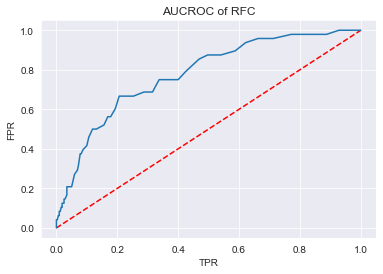

In [109]:
rfc = RandomForestClassifier(n_estimators = 125, criterion = 'entropy',max_features = 'auto')
rfc.fit(X_train, Y_train)
y_pred = rfc.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(Y_test, y_pred)
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.title('AUCROC of RFC')
plt.show()

## Saving the model

In [110]:
import pickle
file = 'RFC_HRAnalytics.pkl'
pickle.dump(rfc, open(file, 'wb'))